Imports

In [1]:
# Importando bibliotecas essenciais para análise de dados e machine learning
import pandas as pd  # Manipulação e análise de dados
import numpy as np  # Operações matemáticas e manipulação de arrays

# Visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos
import seaborn as sns  # Visualização estatística

# Pré-processamento de dados
from sklearn.model_selection import train_test_split  # Divisão de dados em treino e teste
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Escalonamento e codificação

# Modelagem e avaliação
from sklearn.linear_model import LinearRegression, LogisticRegression  # Modelos de regressão
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Modelos baseados em árvores
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix  # Métricas de avaliação

from IPython.display import display
import unicodedata

# Analise de Outliers
from scipy import stats  # Estatísticas e testes
from scipy.stats import zscore  # Cálculo de z-scores  
from sklearn.ensemble import IsolationForest  # Detecção de outliers

# Analise de Valores Ausente
import missingno as msno


In [2]:
def normalizar_texto(texto):
    if isinstance(texto, str):
        texto = texto.strip().upper()
        texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
        return texto
    else:
        return texto  # Retorna como está se não for string (ex: NaN)
    
df_aeronave = pd.read_csv("aeronave.csv", encoding='latin1', sep=';')
df_fator = pd.read_csv("fator_contribuinte.csv", encoding='latin1', sep=';')
df_recomendacao = pd.read_csv("recomendacao.csv", encoding='latin1', sep=';')
df_tipo = pd.read_csv("ocorrencia_tipo.csv", encoding='latin1', sep=';')
df_ocorrencia = pd.read_csv("ocorrencia.csv", encoding='latin1', sep=';')

df_merged = df_ocorrencia.merge(df_aeronave, on='codigo_ocorrencia2', how='left')
df_merged = df_merged.merge(df_fator, on='codigo_ocorrencia3', how='left')
df_merged = df_merged.merge(df_recomendacao, on='codigo_ocorrencia4', how='left')
df_merged = df_merged.merge(df_tipo, on='codigo_ocorrencia1', how='left')

display("Colunas do DataFrame:")
display(df_merged.columns)

display("Tipos de dados de cada coluna:")
display(df_merged.dtypes)

df_merged = df_merged.drop(columns=['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4','ocorrencia_pais','ocorrencia_latitude','ocorrencia_longitude'])
display("Primeiras linhas do DataFrame:")
display(df_merged.head())


# Colunas categóricas (tipos object ou string)
colunas_categoricas = df_merged.select_dtypes(include=['object']).columns.tolist()
print("Colunas categóricas:")
print(colunas_categoricas)

# Colunas discretas (tipos int, excluindo identificadores e códigos)
possiveis_ids = ['codigo_ocorrencia']
colunas_numericas = [
    col for col in df_merged.select_dtypes(include=['int', 'int64']).columns
    if col not in possiveis_ids
]
print("\nColunas numéricas:")
print(colunas_numericas)

for col in colunas_categoricas:
    df_merged[col] = df_merged[col].apply(normalizar_texto)


    # Substituir "NI12O" por "NAO" em todas as colunas do df_merged
df_merged.replace("NI12O", "NAO", inplace=True)
# Substituir ocorrências de "***" ou "*** COLISÃO EM VOO COM OBSTÁCULO (excluir)" por NaN em todas as colunas do df_merged
df_merged.replace(
    to_replace=[r'^\*\*\*$', r'^\*\*\* COLISÃO EM VOO COM OBSTÁCULO \(excluir\)$'],
    value=np.nan,
    regex=True,
    inplace=True
)


'Colunas do DataFrame:'

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_catego

'Tipos de dados de cada coluna:'

codigo_ocorrencia                    int64
codigo_ocorrencia1                   int64
codigo_ocorrencia2                   int64
codigo_ocorrencia3                   int64
codigo_ocorrencia4                   int64
ocorrencia_classificacao            object
ocorrencia_latitude                 object
ocorrencia_longitude                object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_pais                     object
ocorrencia_aerodromo                object
ocorrencia_dia                      object
ocorrencia_hora                     object
investigacao_aeronave_liberada      object
investigacao_status                 object
divulgacao_relatorio_numero         object
divulgacao_relatorio_publicado      object
divulgacao_dia_publicacao           object
total_recomendacoes                  int64
total_aeronaves_envolvidas           int64
ocorrencia_saida_pista              object
aeronave_matricula                  object
aeronave_op

'Primeiras linhas do DataFrame:'

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,...,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,86954,ACIDENTE,TUPANCIRETÃ,RS,SIPJ,04/04/2025,17:20:00,NÃO,ATIVA,A DEFINIR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL
1,86953,ACIDENTE,PILAR,AL,FAER,04/04/2025,09:05:00,SIM,ATIVA,A DEFINIR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA OU MAU FUNCIONAMENTO DO MOTOR,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP
2,86952,INCIDENTE,SÃO LUÍS,MA,SBSL,03/04/2025,20:45:00,SIM,FINALIZADA,***,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
3,86951,INCIDENTE GRAVE,CHAPECÓ,SC,SBCH,31/03/2025,22:30:00,SIM,ATIVA,IG-048/CENIPA/2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
4,86950,INCIDENTE,GUARULHOS,SP,SBGR,05/04/2025,11:00:00,SIM,FINALIZADA,***,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD


Colunas categóricas:
['ocorrencia_classificacao', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'ocorrencia_saida_pista', 'aeronave_matricula', 'aeronave_operador_categoria', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pais_fabricante', 'aeronave_pais_registro', 'aeronave_registro_categoria', 'aeronave_registro_segmento', 'aeronave_voo_origem', 'aeronave_voo_destino', 'aeronave_fase_operacao', 'aeronave_tipo_operacao', 'aeronave_nivel_dano', 'fator_nome', 'fator_aspecto', 'fator_condicionante', 'fator_area', 'recomendacao_numero', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback', 'recomendacao_conteudo', 'recomendacao_status', 'recomend

In [3]:
print("\nValores nulos em cada coluna (%):")
display((df_merged.isnull().mean()).sort_values(ascending=False) * 100)
print("\nValores únicos em cada coluna (%):")
display((df_merged.nunique() / len(df_merged) ).sort_values(ascending=False) * 100)



Valores nulos em cada coluna (%):


aeronave_operador_categoria        92.788653
recomendacao_dia_feedback          48.875136
recomendacao_status                48.072990
fator_condicionante                39.188292
recomendacao_destinatario_sigla    37.884140
recomendacao_conteudo              37.884140
recomendacao_dia_assinatura        37.884140
recomendacao_dia_encaminhamento    37.884140
recomendacao_numero                37.884140
recomendacao_destinatario          37.884140
fator_nome                         30.526707
fator_area                         30.526707
fator_aspecto                      30.526707
divulgacao_dia_publicacao          29.636909
divulgacao_relatorio_numero        26.885176
aeronave_registro_segmento          9.779808
aeronave_assentos                   3.537943
aeronave_motor_tipo                 3.476852
aeronave_tipo_icao                  3.434354
aeronave_tipo_operacao              3.102340
aeronave_ano_fabricacao             2.892507
aeronave_motor_quantidade           1.567107
aeronave_n


Valores únicos em cada coluna (%):


codigo_ocorrencia                  34.627746
aeronave_matricula                 18.011103
ocorrencia_dia                     13.567425
recomendacao_numero                 8.446439
recomendacao_conteudo               8.310978
divulgacao_relatorio_numero         7.652262
ocorrencia_cidade                   3.784961
ocorrencia_hora                     3.333422
aeronave_modelo                     2.897819
aeronave_voo_origem                 2.520651
recomendacao_dia_feedback           2.510027
aeronave_voo_destino                2.499402
ocorrencia_aerodromo                1.989429
aeronave_pmd                        1.784908
aeronave_pmd_categoria              1.784908
recomendacao_dia_encaminhamento     1.110255
recomendacao_dia_assinatura         0.940264
divulgacao_dia_publicacao           0.913703
aeronave_fabricante                 0.900422
aeronave_tipo_icao                  0.815427
recomendacao_destinatario_sigla     0.472788
recomendacao_destinatario           0.472788
aeronave_a

In [4]:
# Exibir os valores únicos de cada coluna categórica
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(df_merged[coluna].unique())


Coluna: ocorrencia_classificacao
['ACIDENTE' 'INCIDENTE' 'INCIDENTE GRAVE']

Coluna: ocorrencia_cidade
['TUPANCIRETA' 'PILAR' 'SAO LUIS' ... 'FERROS' 'ARCOVERDE' 'BOCAIUVA']

Coluna: ocorrencia_uf
['RS' 'AL' 'MA' 'SC' 'SP' 'RJ' 'ES' 'DF' 'GO' 'MT' 'PR' 'AM' 'PE' 'MG'
 'RR' 'CE' 'BA' 'TO' 'RO' 'PA' 'RN' 'MS' 'AP' nan 'AC' 'PI' 'SE' 'PB']

Coluna: ocorrencia_aerodromo
['SIPJ' 'FAER' 'SBSL' 'SBCH' 'SBGR' 'SBGL' 'SBMI' 'SIVU' 'SBBR' 'SBGO'
 'SBKP' 'SBCT' 'SBCY' 'SBTF' 'SBFI' 'SD6X' 'SBPA' 'SBFZ' 'SBVT' 'SBPS'
 'SDVG' 'SWGN' 'SBRP' 'SBSP' 'SBSV' 'SD2D' 'SBCF' 'SBPG' 'SBME' 'SWPF'
 'SBNM' 'SBMT' 'SBML' 'SBNV' 'SBJR' 'SBSI' 'SBJV' 'SBBE' 'SBNF' 'SBRF'
 'SBSG' 'SBPF' 'SBUL' 'SWFN' 'SNJL' 'SBFS' 'SJGU' 'SBBI' 'SBFL' 'SIVQ'
 'SBMQ' 'SNPA' 'NCAD' 'SNRU' 'SBCP' 'SWUQ' 'SWPD' 'SDYT' 'SSAY' 'SDJO'
 'SBMA' 'SBJH' 'SDCO' 'SBAE' 'SBSR' 'SBJA' 'SBEG' 'SBCB' 'SIG7' 'SJNP'
 'SBCX' 'SBCG' 'SDPW' 'SNWD' 'SBRJ' 'SBIP' 'SSDK' 'SBRB' 'SBMK' 'SBES'
 'SWNS' 'SBLO' 'SSKW' 'SDIH' 'SSNG' 'SJXG' 'SDUB' 'SJSN' 'SBTE

In [5]:
# Exibir os valores únicos de cada coluna numéricas
for coluna in colunas_numericas:
    print(f"\nColuna: {coluna}")
    print(df_merged[coluna].unique())


Coluna: total_recomendacoes
[ 0  2  1  4  3  5  7  6  8  9 12 13 11 20 23 10 19 18 14 22 15 29 16 83]

Coluna: total_aeronaves_envolvidas
[1 2 0 3 4]


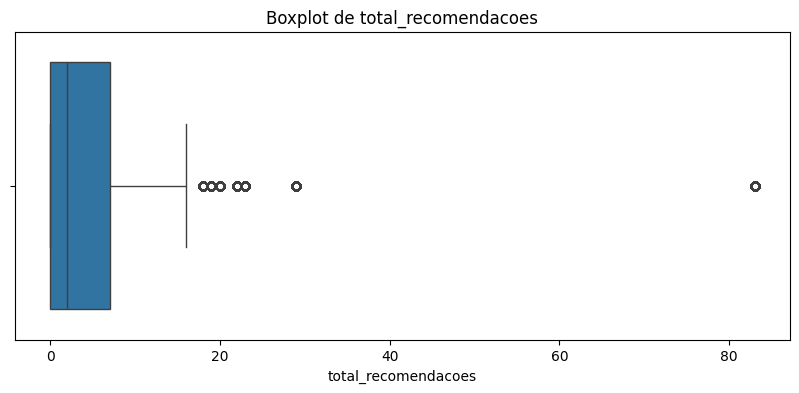

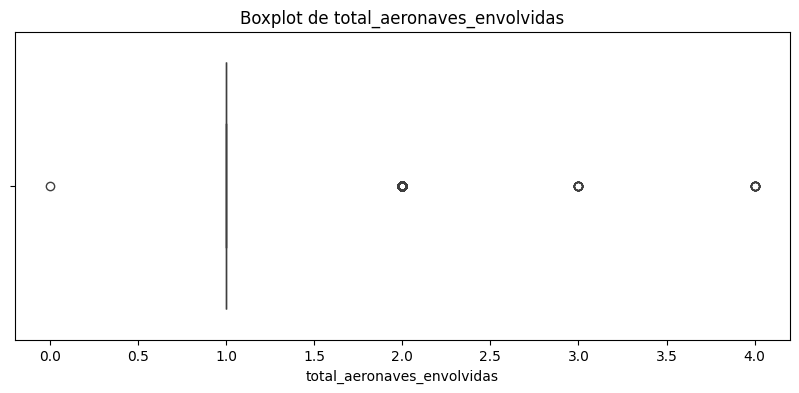

In [6]:
#Boxplots para Outliers: Verificação visual de outliers em variáveis numéricas.
for col in colunas_numericas:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_merged[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

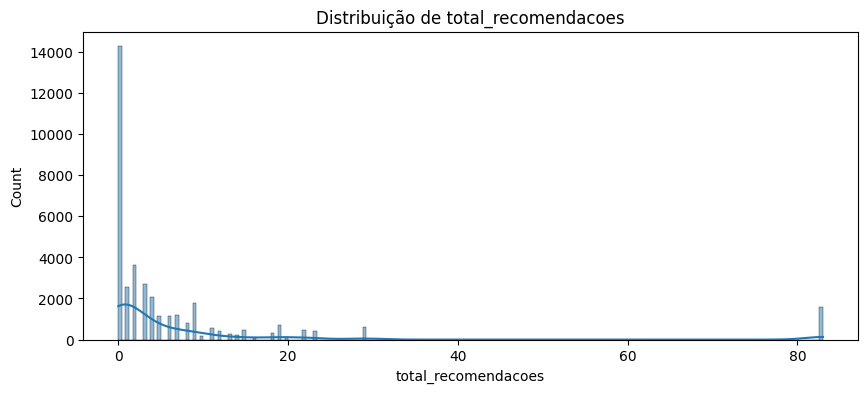

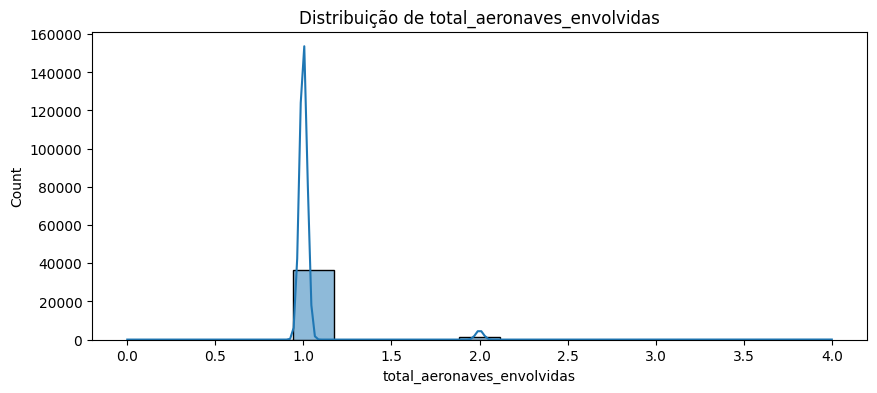

In [7]:
#Distribuição de Variáveis Numéricas: Vamos visualizar como os dados numéricos estão distribuídos e detectar possíveis outliers.
for col in colunas_numericas:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_merged[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

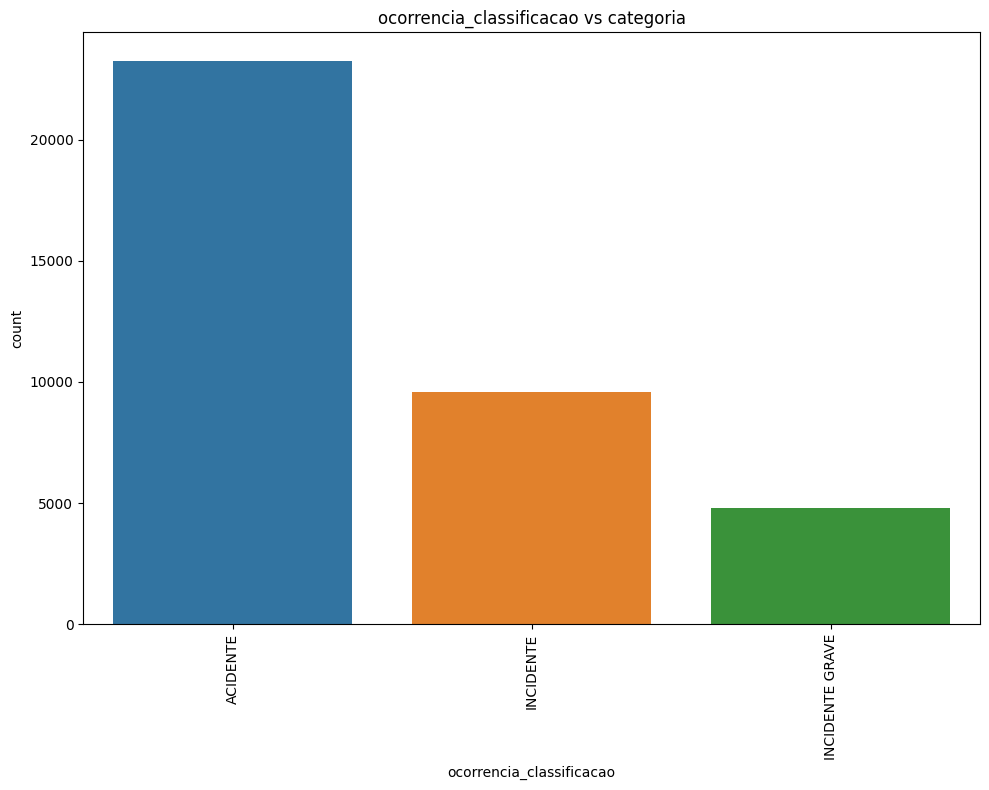

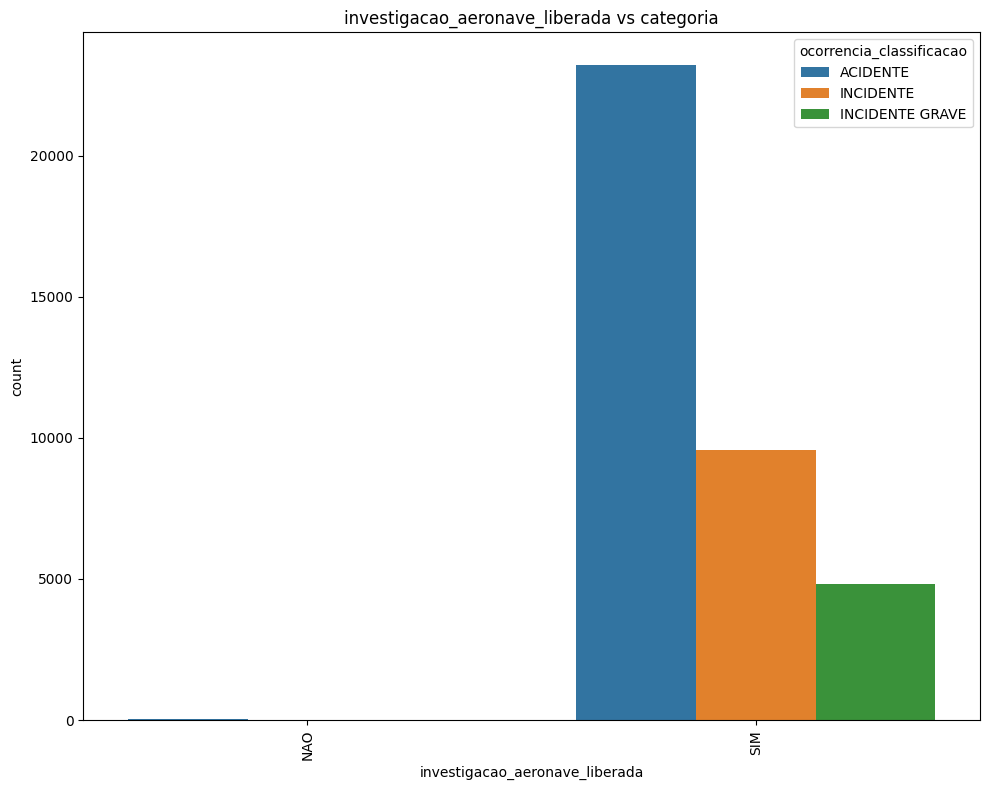

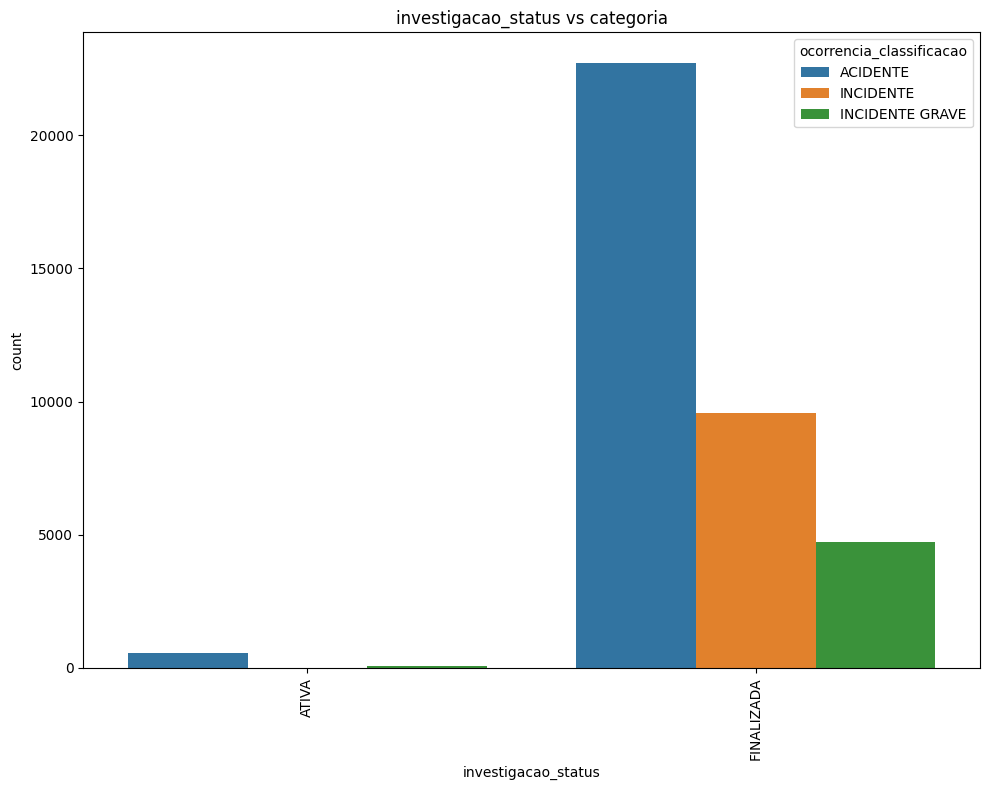

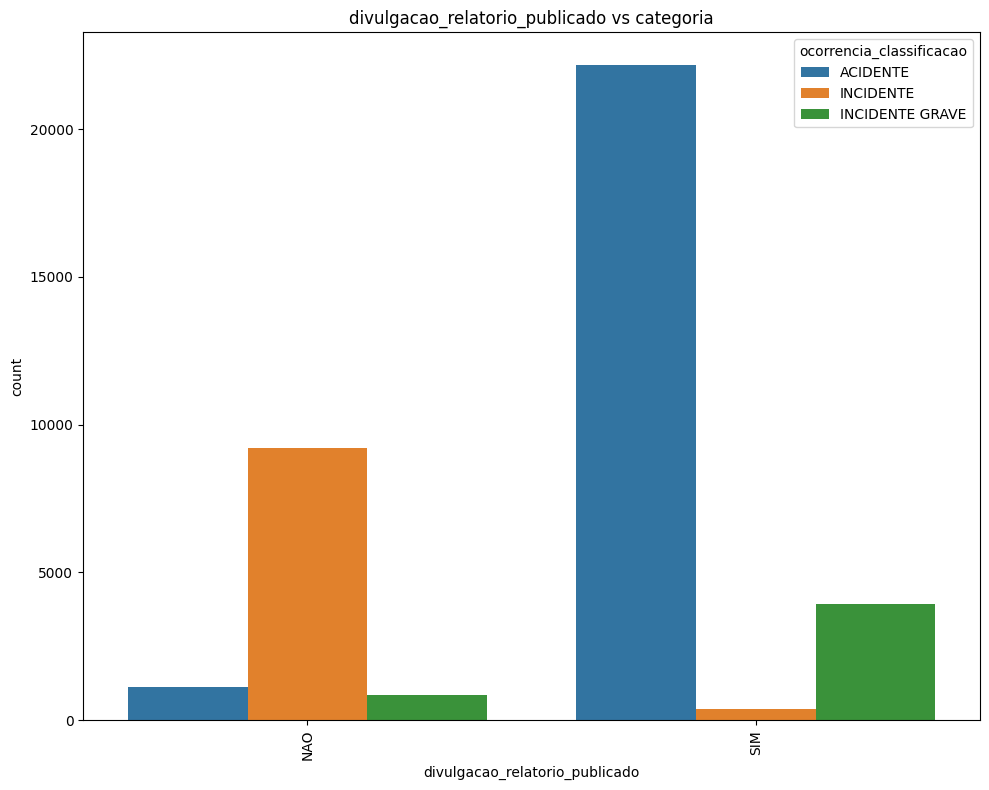

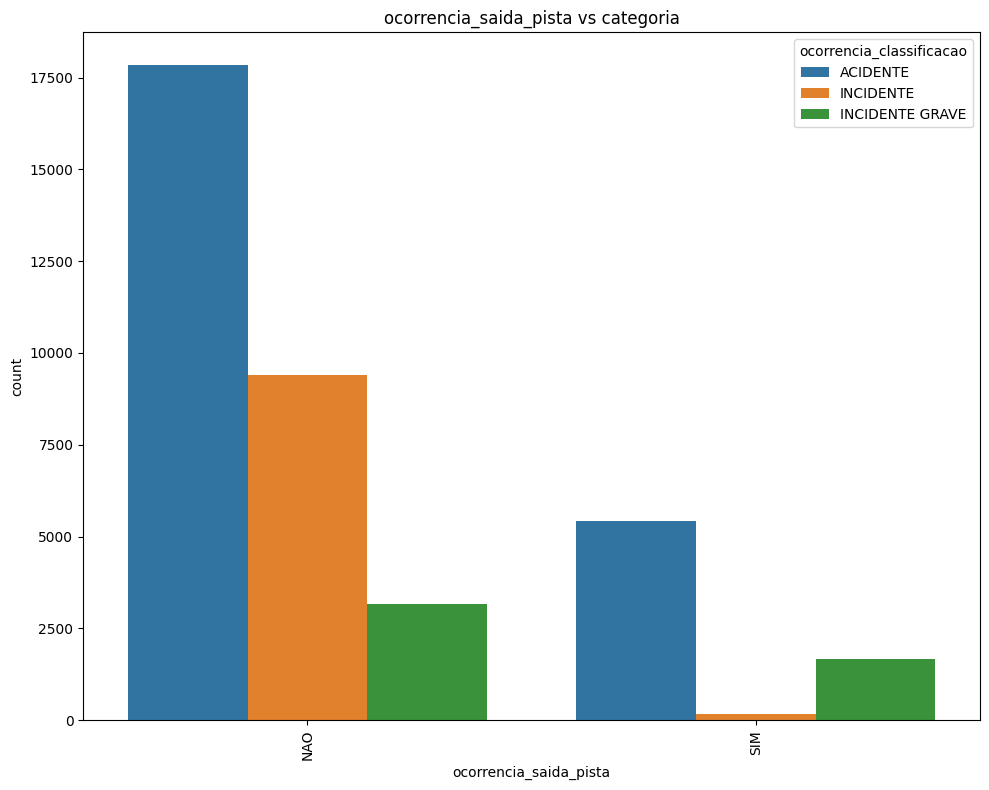

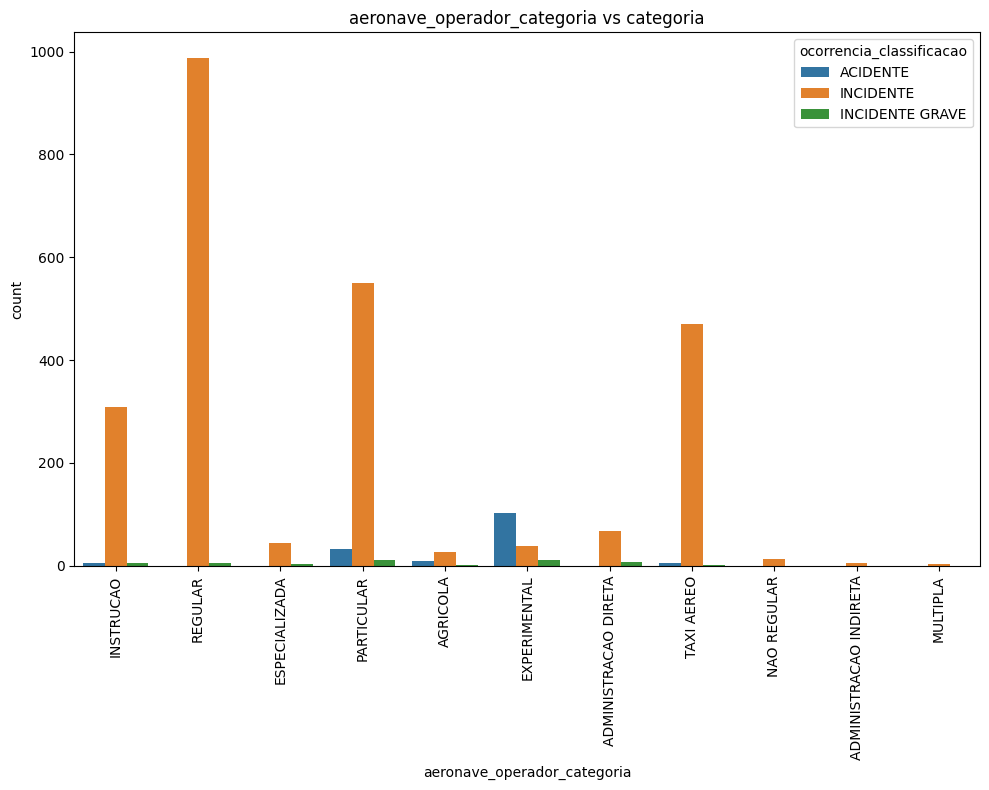

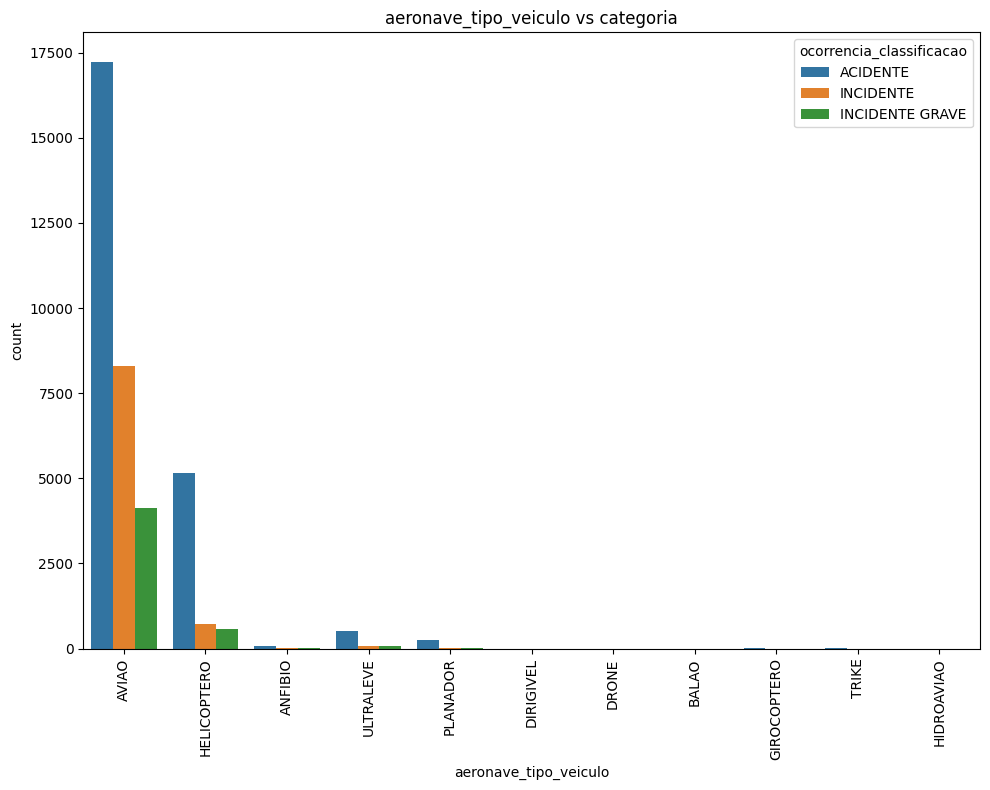

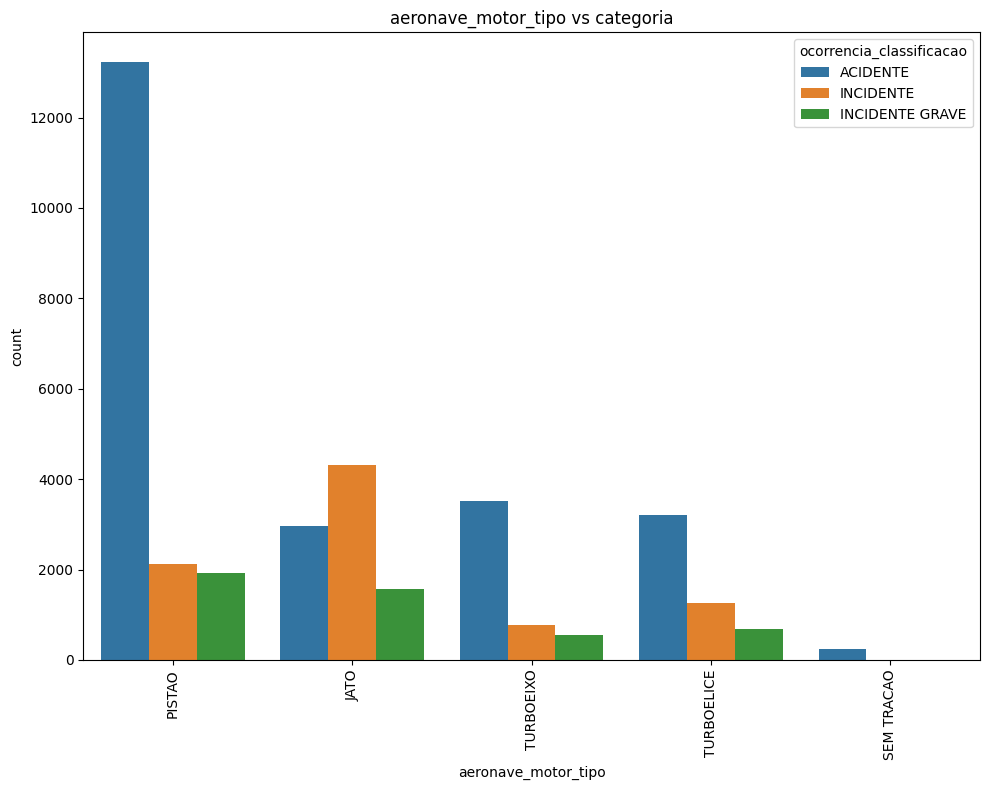

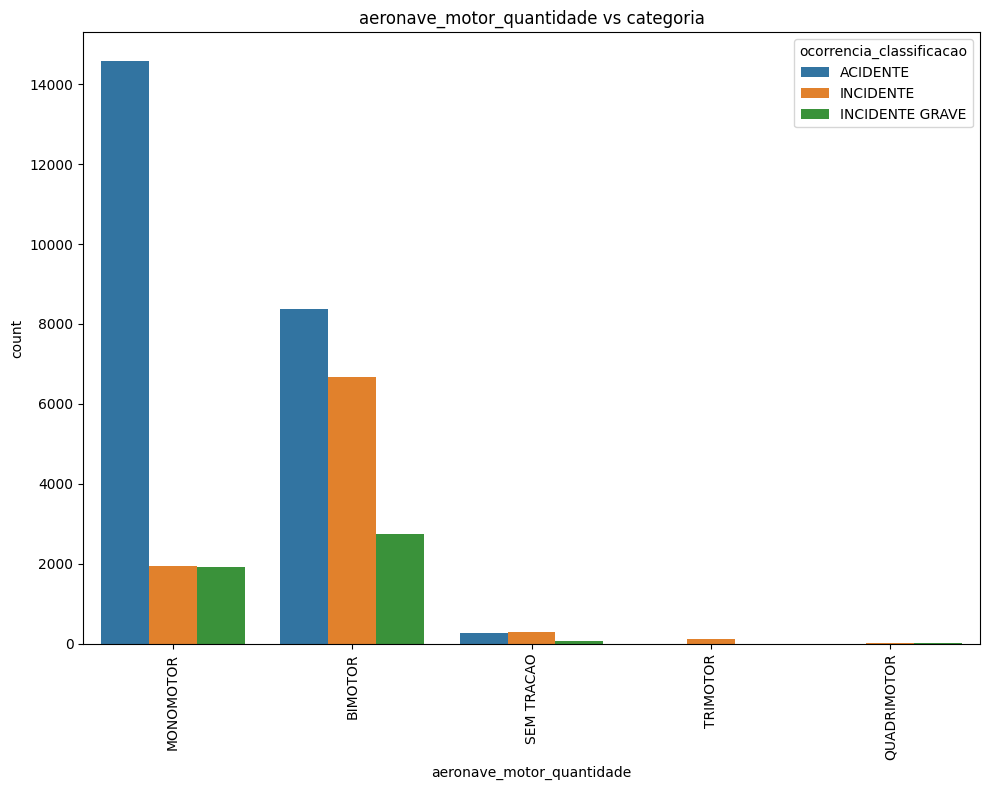

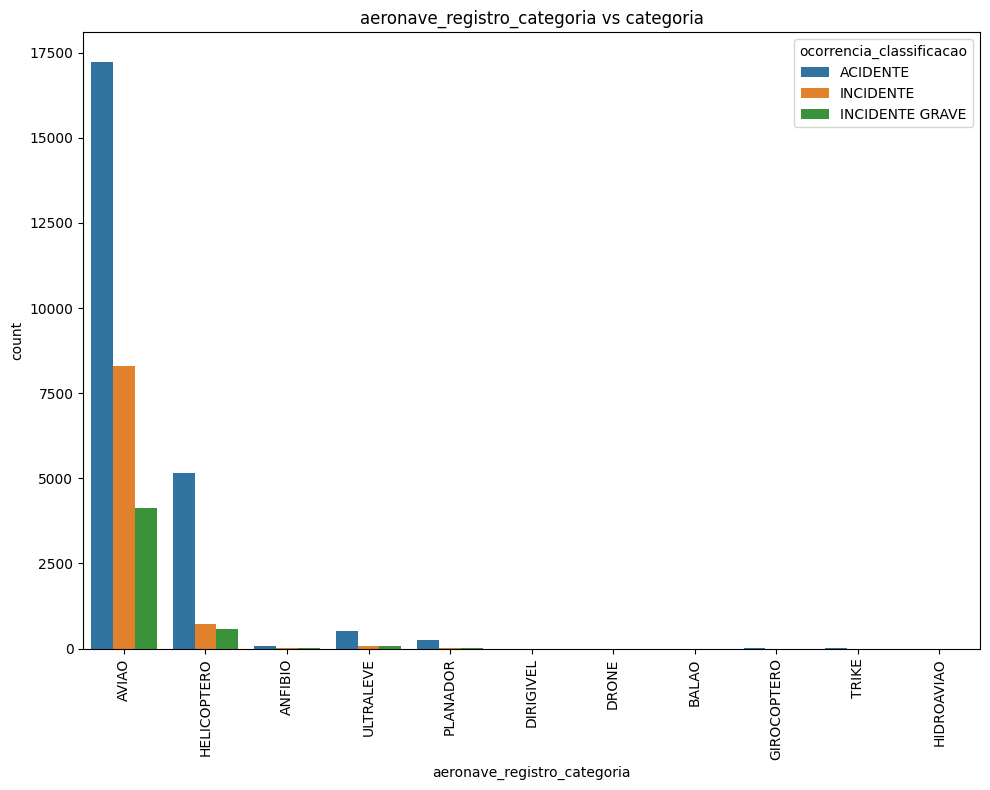

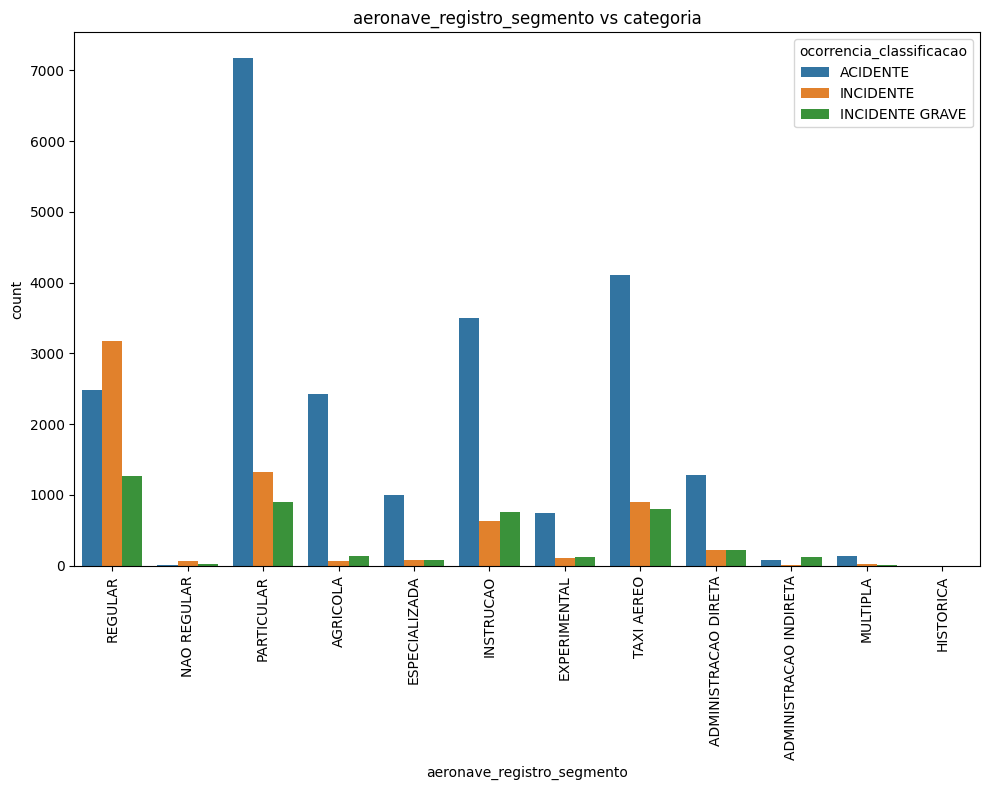

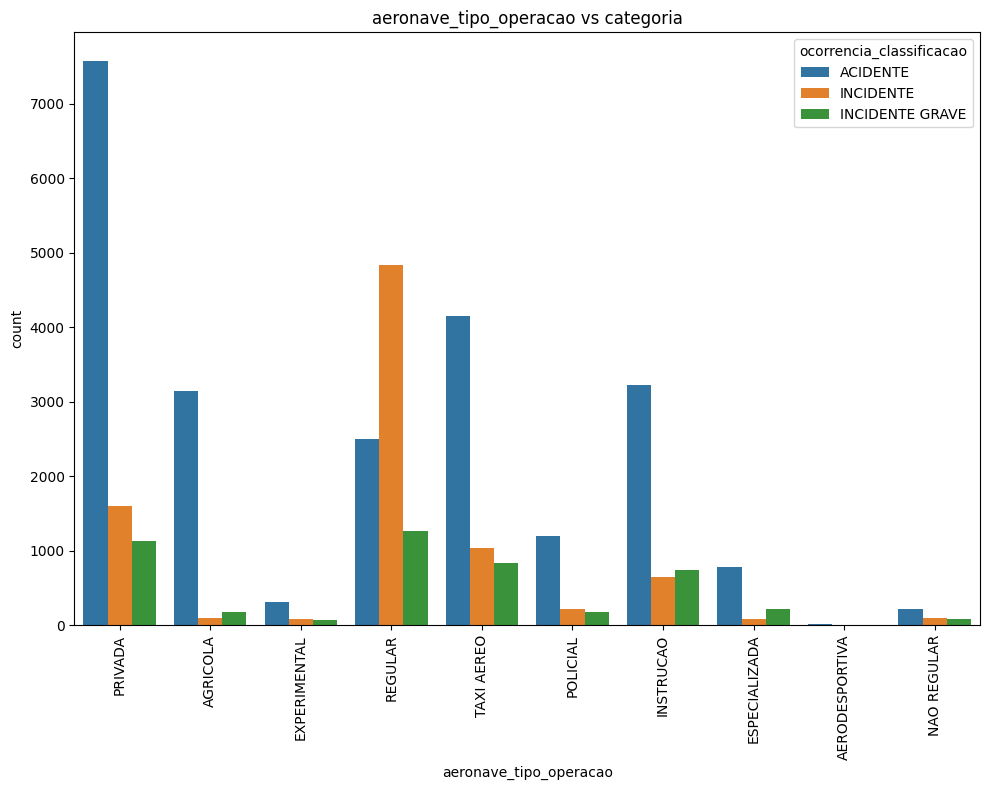

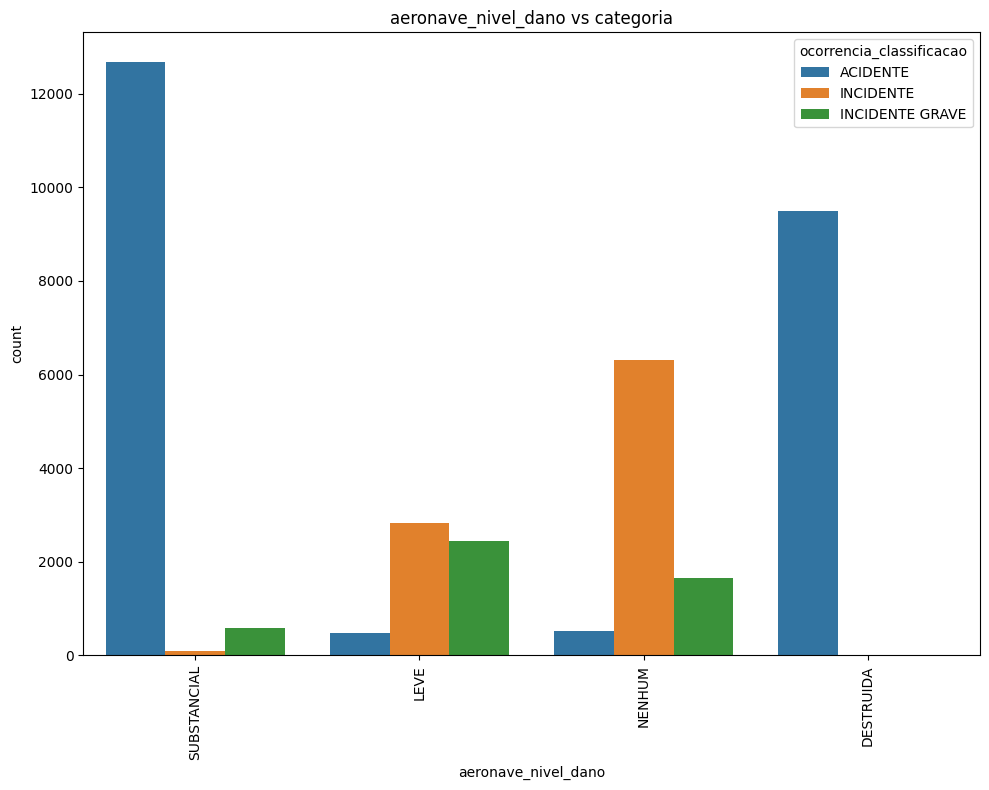

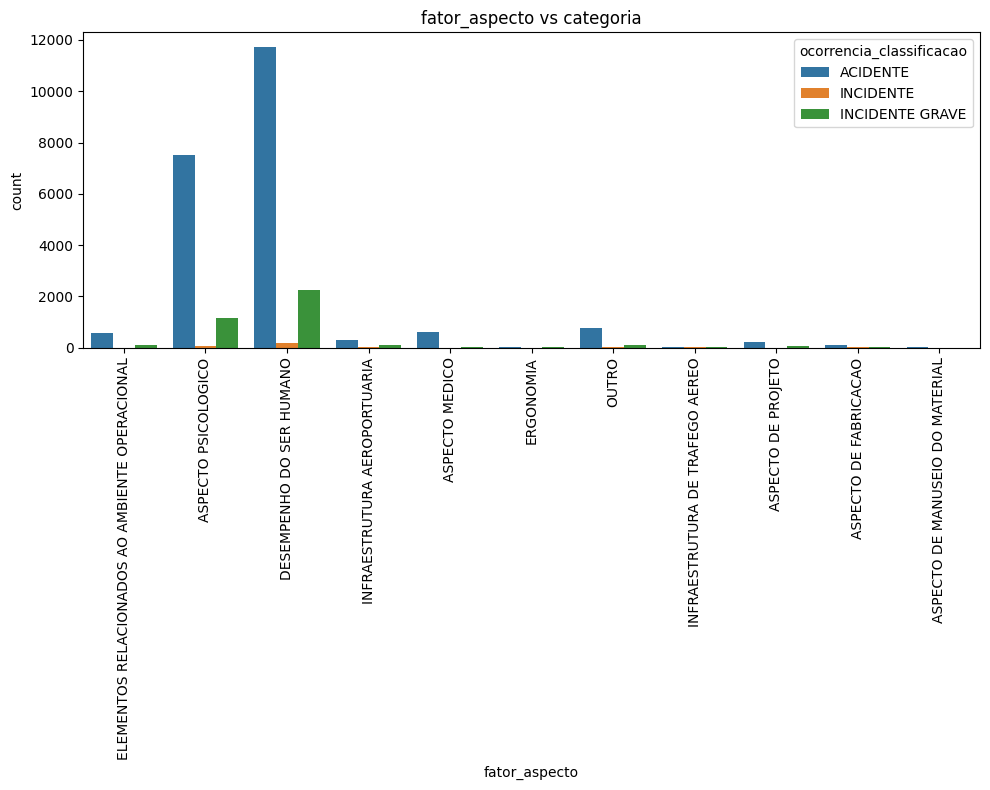

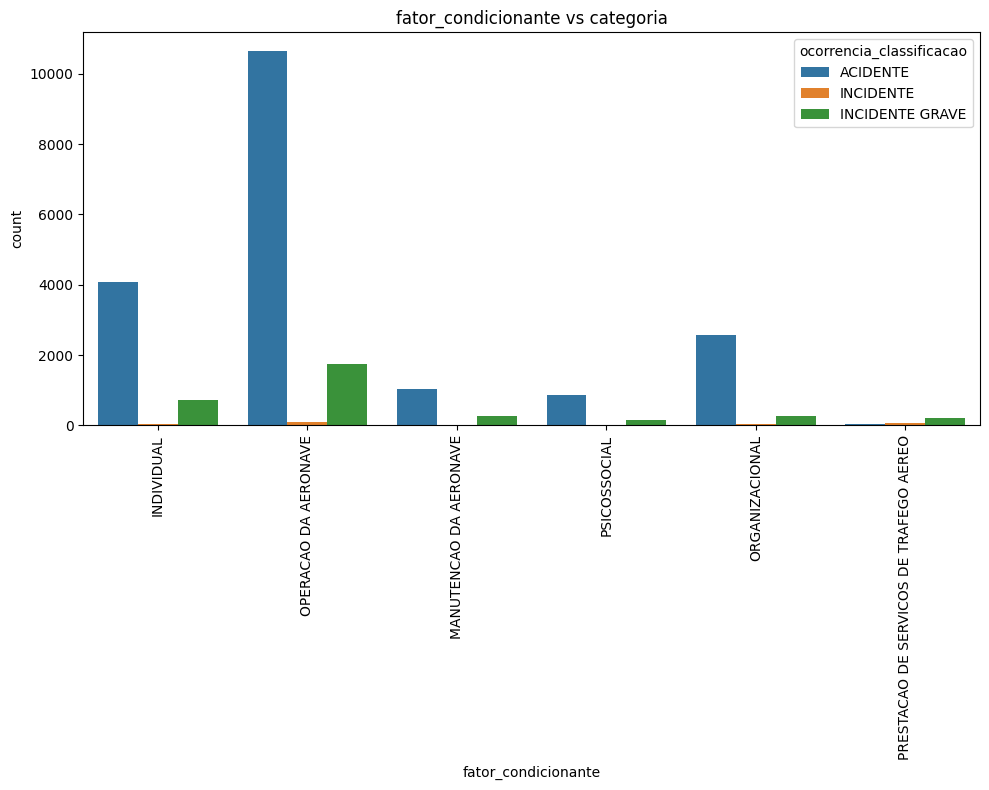

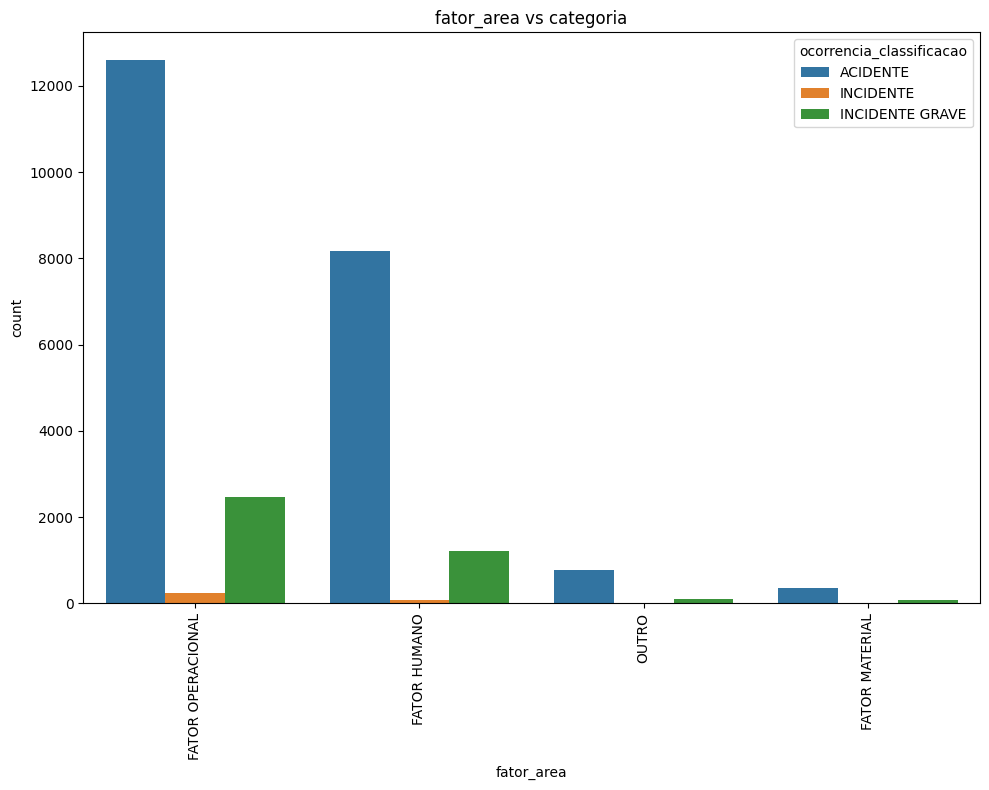

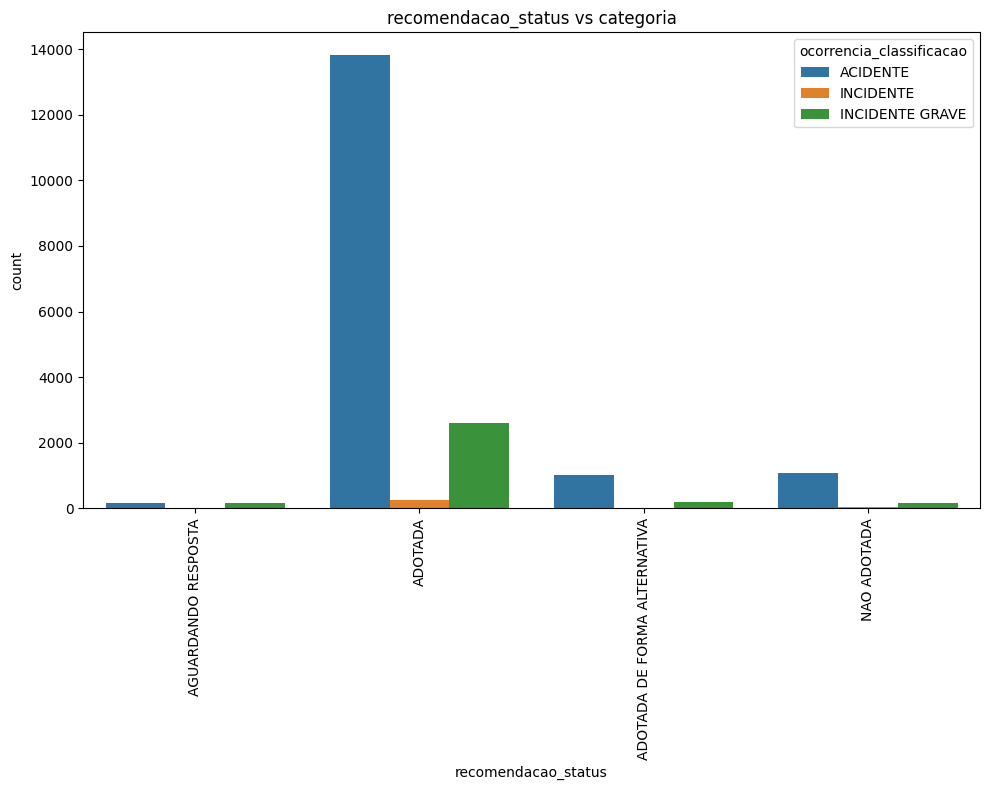

In [8]:
# Relação entre Variáveis Categóricas e a Categoria-Alvo: Vamos observar como as categorias de cada variável se distribuem por classe.
for col in colunas_categoricas:
    if df_merged[col].nunique() < 20:
        plt.figure(figsize=(10, 8))
        sns.countplot(data=df_merged, x=col, hue='ocorrencia_classificacao')
        plt.title(f'{col} vs categoria')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [9]:
# Cardinalidade de Variáveis Categóricas: Ver quantas categorias existem em cada variável e sugerir agrupamento de menos frequentes.
for col in colunas_categoricas:
    print(f'{col}: {df_merged[col].nunique()} categorias')
    print(df_merged[col].value_counts().tail())
    print('-' * 40)

ocorrencia_classificacao: 3 categorias
ocorrencia_classificacao
ACIDENTE           23268
INCIDENTE           9572
INCIDENTE GRAVE     4809
Name: count, dtype: int64
----------------------------------------
ocorrencia_cidade: 1425 categorias
ocorrencia_cidade
GRAJAU                      1
TUPANCIRETA                 1
MARIA HELENA                1
SANTA MARIA DA BOA VISTA    1
PANORAMA                    1
Name: count, dtype: int64
----------------------------------------
ocorrencia_uf: 27 categorias
ocorrencia_uf
SE    255
RO    230
RN    203
PB    102
AP     67
Name: count, dtype: int64
----------------------------------------
ocorrencia_aerodromo: 749 categorias
ocorrencia_aerodromo
SNAR    1
SNXT    1
SIPJ    1
SBOI    1
SWWF    1
Name: count, dtype: int64
----------------------------------------
ocorrencia_dia: 5108 categorias
ocorrencia_dia
03/03/2025    1
10/06/2007    1
06/06/2007    1
18/07/2007    1
21/08/2007    1
Name: count, dtype: int64
------------------------------------

Ocorrencias por Estado

<Axes: title={'center': 'Ocorrências por Estado'}, xlabel='Estado', ylabel='Quantidade de Ocorrências'>

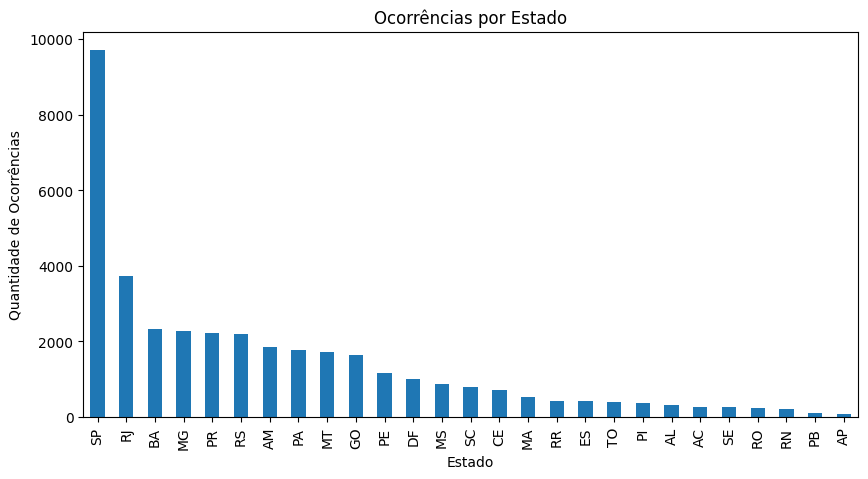

In [10]:
df_merged['ocorrencia_uf'].value_counts().plot(kind='bar', title='Ocorrências por Estado', xlabel='Estado', ylabel='Quantidade de Ocorrências',figsize=(10, 5))


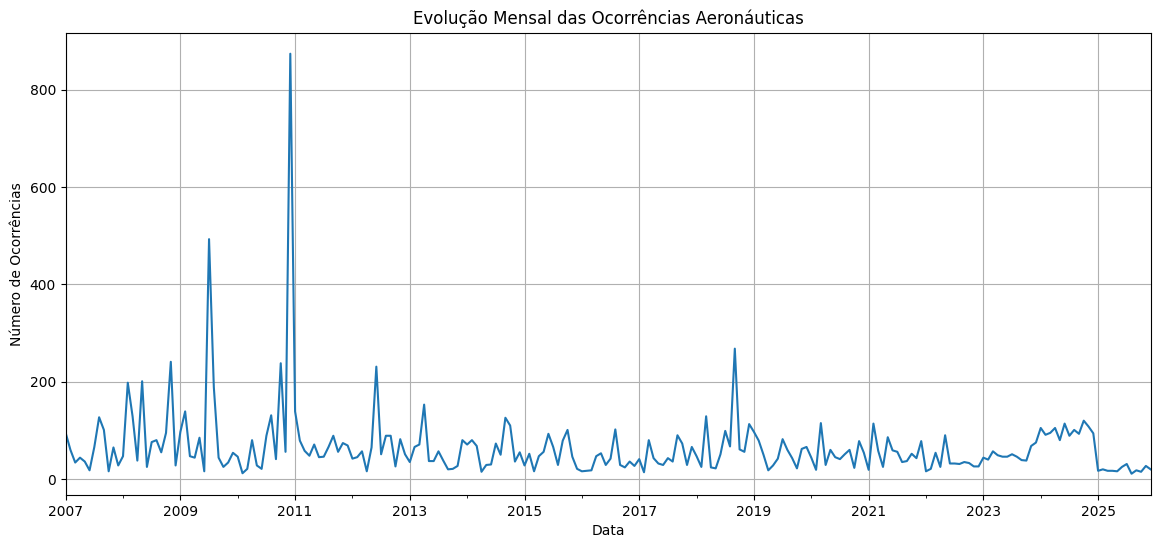

In [11]:
df_merged['ocorrencia_dia'] = pd.to_datetime(df_merged['ocorrencia_dia'], errors='coerce')

plt.figure(figsize=(14, 6))
df_merged.set_index('ocorrencia_dia').resample('ME').size().plot()
plt.title('Evolução Mensal das Ocorrências Aeronáuticas')
plt.xlabel('Data')
plt.ylabel('Número de Ocorrências')
plt.grid()
plt.show()

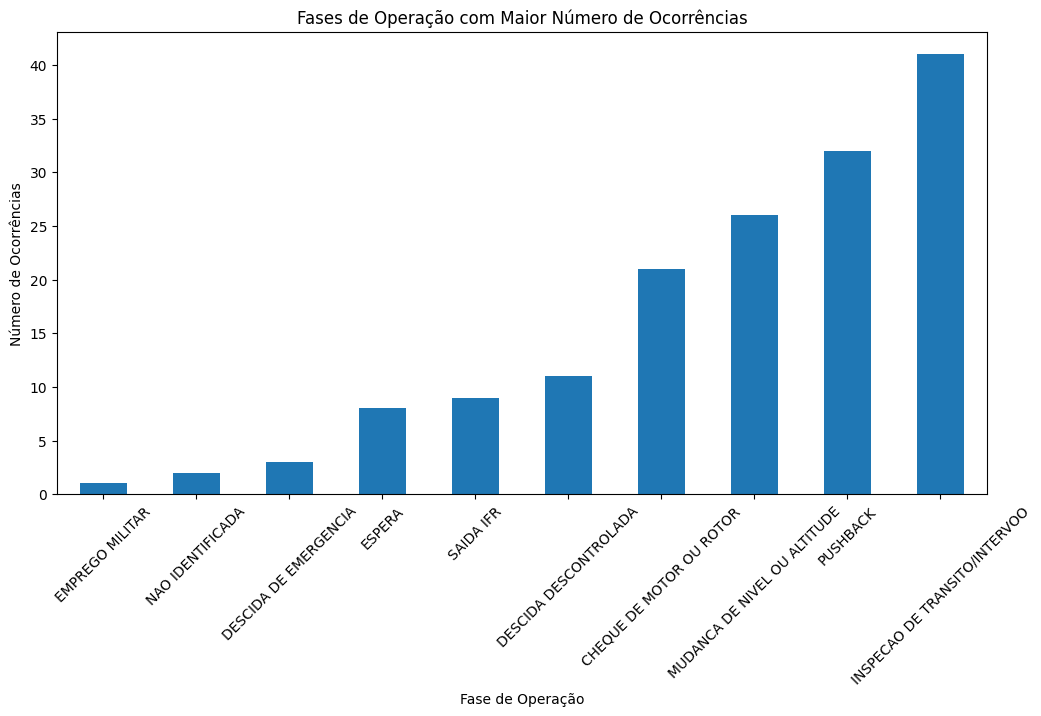

In [12]:
plt.figure(figsize=(12, 6))
df_merged['aeronave_fase_operacao'].value_counts().sort_values().head(10).plot(kind='bar')
plt.title('Fases de Operação com Maior Número de Ocorrências')
plt.xlabel('Fase de Operação')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

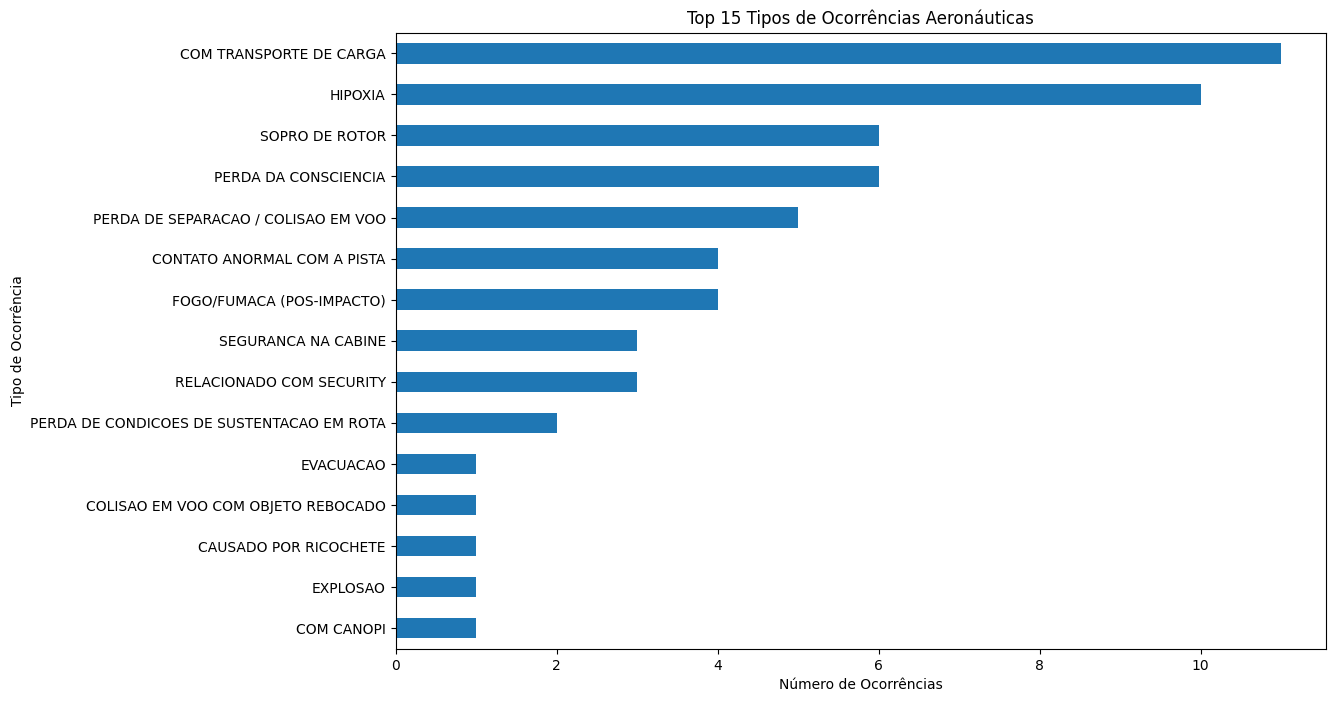

In [13]:
plt.figure(figsize=(12, 8))
df_merged['ocorrencia_tipo'].value_counts(ascending=True).head(15).plot(kind='barh')
plt.title('Top 15 Tipos de Ocorrências Aeronáuticas')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tipo de Ocorrência')
plt.show()

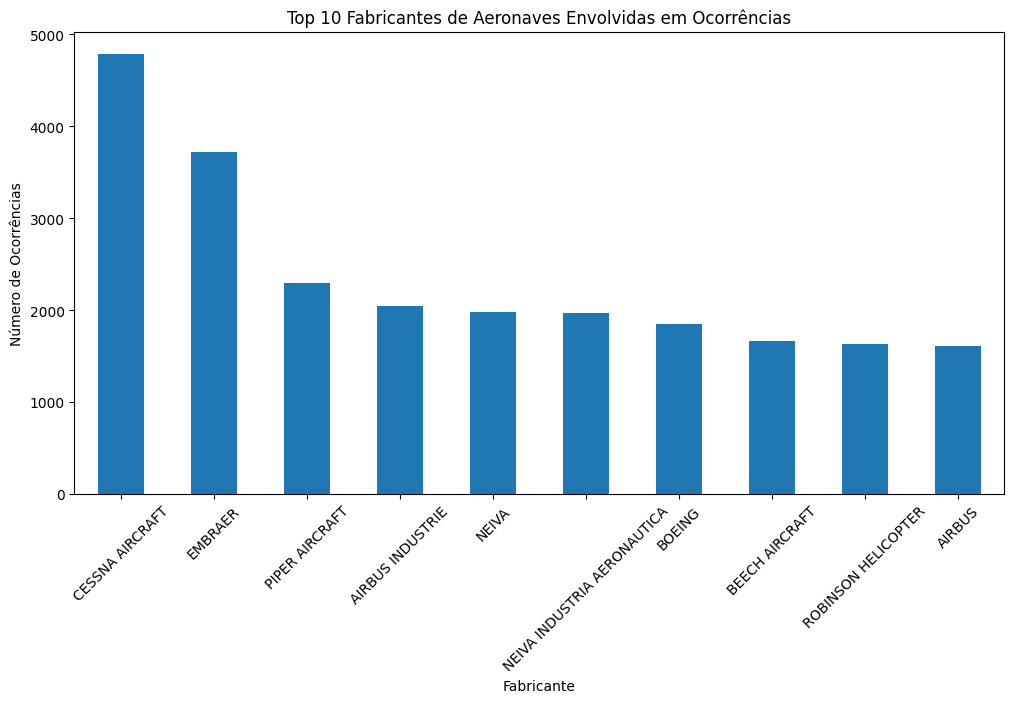

In [14]:
plt.figure(figsize=(12, 6))
df_merged['aeronave_fabricante'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Fabricantes de Aeronaves Envolvidas em Ocorrências')
plt.xlabel('Fabricante')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

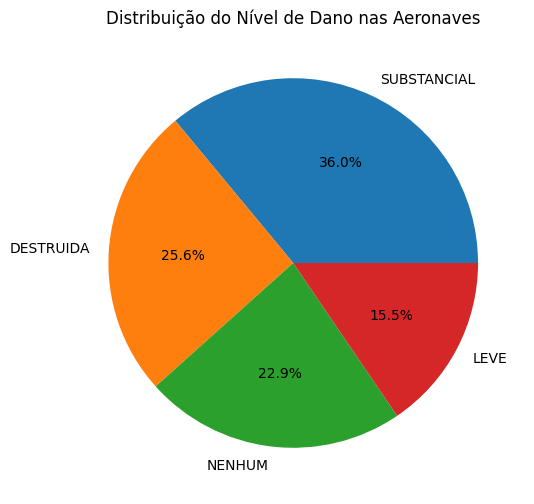

In [15]:
plt.figure(figsize=(10, 6))
df_merged['aeronave_nivel_dano'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição do Nível de Dano nas Aeronaves')
plt.ylabel('')
plt.show()

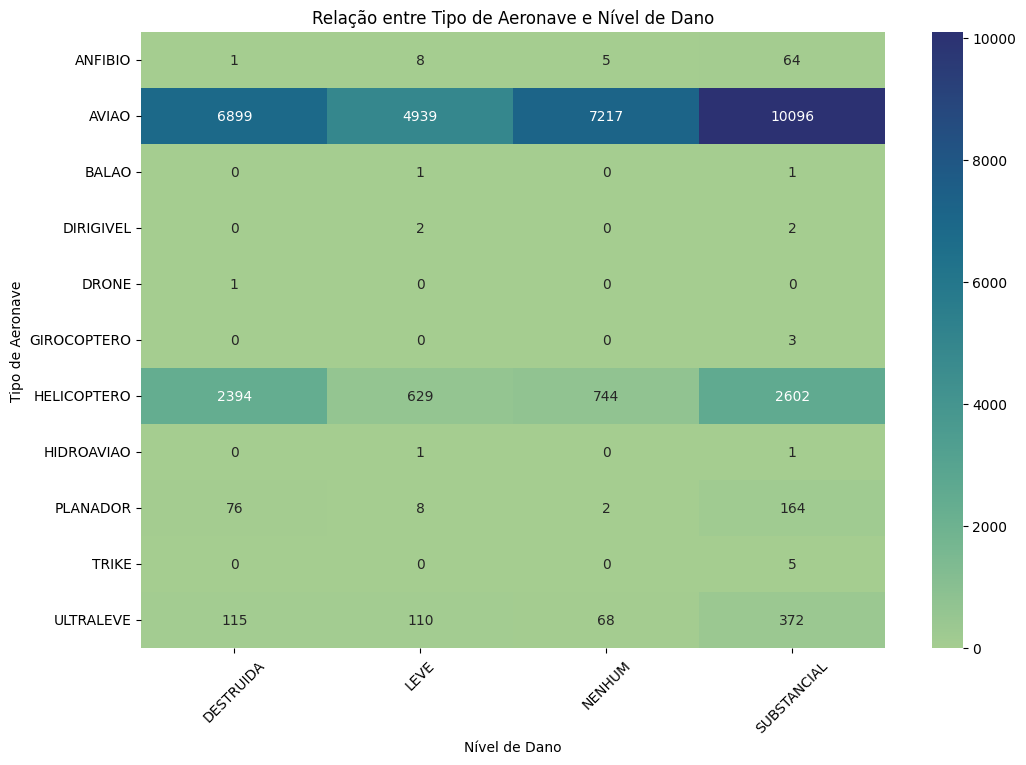

In [16]:

plt.figure(figsize=(12, 8))
cross_tab = pd.crosstab(df_merged['aeronave_tipo_veiculo'], df_merged['aeronave_nivel_dano'])
sns.heatmap(cross_tab, cmap='crest', annot=True, fmt='d')
plt.title('Relação entre Tipo de Aeronave e Nível de Dano')
plt.xlabel('Nível de Dano')
plt.ylabel('Tipo de Aeronave')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


idade_aeronave
Velho (<1990)                15795
Intermediário (1990-2009)    14975
Novo (2010+)                  5790
Name: count, dtype: int64


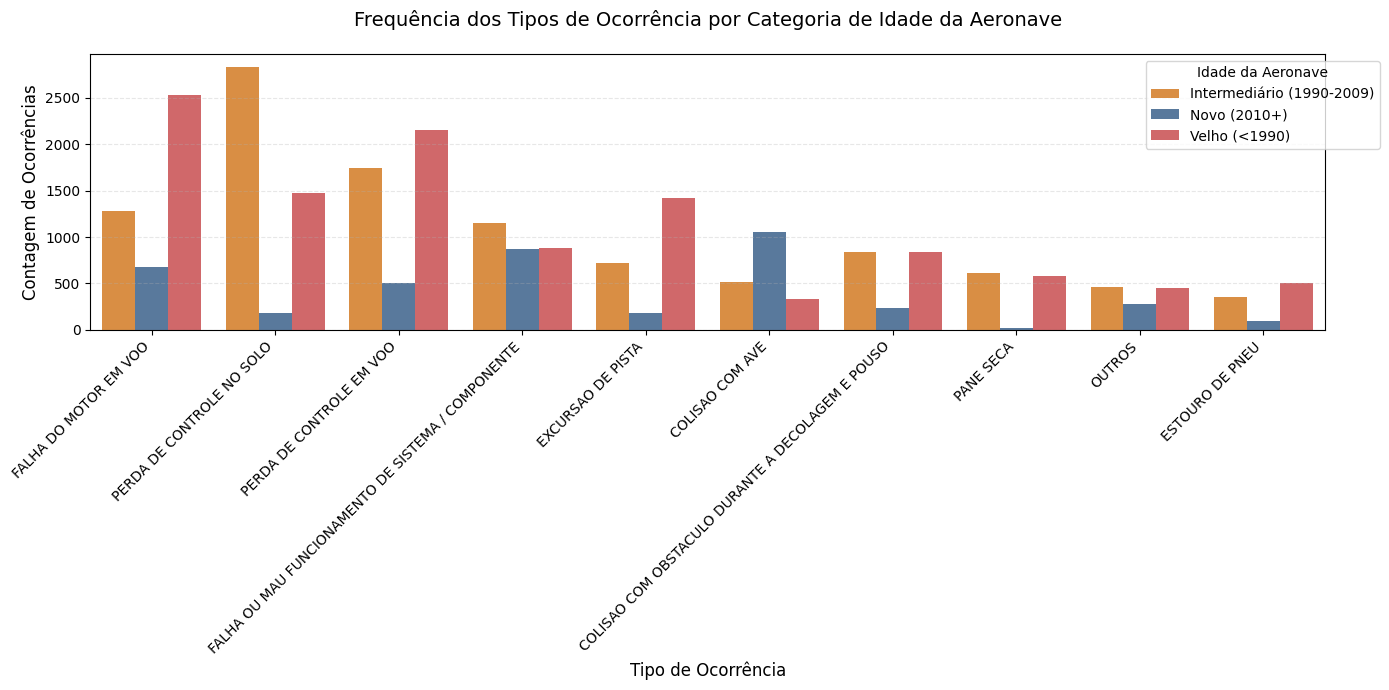

In [17]:

# Criar categorias baseadas no ano de fabricação
def categorizar_idade(ano):
    if pd.isna(ano):
        return None
    ano = int(ano)
    if ano >= 2010:
        return 'Novo (2010+)'
    elif ano >= 1990:
        return 'Intermediário (1990-2009)'
    else:
        return 'Velho (<1990)'

# Aplicar a categorização
df_merged['idade_aeronave'] = df_merged['aeronave_ano_fabricacao'].apply(categorizar_idade)

# Verificar a distribuição
print(df_merged['idade_aeronave'].value_counts())

# Filtrar os 5 tipos mais comuns de ocorrência
top_5_ocorrencias = df_merged['ocorrencia_tipo'].value_counts().head(10).index
df_top = df_merged[df_merged['ocorrencia_tipo'].isin(top_5_ocorrencias)].dropna(subset=['idade_aeronave'])

# Configurar o gráfico
plt.figure(figsize=(14, 7))
sns.countplot(data=df_top, 
              x='ocorrencia_tipo', 
              hue='idade_aeronave',
              palette={'Novo (2010+)': '#4e79a7', 
                       'Intermediário (1990-2009)': '#f28e2b', 
                       'Velho (<1990)': '#e15759'},
              order=top_5_ocorrencias)

# Ajustes estéticos
plt.title('Frequência dos Tipos de Ocorrência por Categoria de Idade da Aeronave', pad=20, fontsize=14)
plt.xlabel('Tipo de Ocorrência', fontsize=12)
plt.ylabel('Contagem de Ocorrências', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Idade da Aeronave', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Detecção de Outliers usando Z-Score
print("\nDetecção de Outliers usando Z-Score:")
df_temp = df_merged
for col in colunas_numericas:
    df_temp[f'zscore_{col}'] = zscore(df_merged[col].dropna())
    outliers = df_merged[df_temp[f'zscore_{col}'].abs() > 3]
    print(f"Outliers detected in {col}:")
display(outliers)


Detecção de Outliers usando Z-Score:
Outliers detected in total_recomendacoes:
Outliers detected in total_aeronaves_envolvidas:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,...,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,zscore_total_recomendacoes,zscore_total_aeronaves_envolvidas
27,86916,INCIDENTE,GOIANIA,GO,SBGO,NaT,21:00:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novo (2010+),-0.450299,5.425758
28,86916,INCIDENTE,GOIANIA,GO,SBGO,NaT,21:00:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Velho (<1990),-0.450299,5.425758
624,86205,INCIDENTE,SAO PAULO,SP,SBSP,2024-03-12,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,...,NaN,NaN,NaN,NaN,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Novo (2010+),-0.450299,5.425758
625,86205,INCIDENTE,SAO PAULO,SP,SBSP,2024-03-12,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,...,NaN,NaN,NaN,NaN,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,5.425758
630,86201,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBRJ,2024-10-12,18:00:00,SIM,ATIVA,IG-176/CENIPA/2024,...,NaN,NaN,NaN,NaN,TRAFEGO AEREO,PERDA DE SEPARACAO / COLISAO EM VOO | TRAFEGO ...,MAC,Novo (2010+),-0.450299,5.425758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29626,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009
29627,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009
29628,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009
30715,36326,INCIDENTE,SAO PAULO,SP,SBSP,NaT,21:20:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,NaN,TRAFEGO AEREO,PERDA DE SEPARACAO / COLISAO EM VOO | TRAFEGO ...,MAC,Velho (<1990),-0.450299,5.425758


In [19]:
# Detecção de Outliers usando IQR (Intervalo Interquartil)
print("\nDetecção de Outliers usando IQR:")
for col in colunas_numericas:
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_merged[(df_merged[col] < lower_bound) | (df_merged[col] > upper_bound)]
    print(f"Outliers detectados em {col} usando IQR:")
    display(outliers)


Detecção de Outliers usando IQR:
Outliers detectados em total_recomendacoes usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,...,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,zscore_total_recomendacoes,zscore_total_aeronaves_envolvidas
22013,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,NaT,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,...,"EFETUAR IMEDIATAMENTE UMA AVALIACAO, EM CARATE...",ADOTADA,ANAC,AGENCIA NACIONAL DE AVIACAO CIVIL,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),0.730667,-0.173868
22014,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,NaT,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,...,"DEFINIR, EM CARATER DE REGULACAO, REQUISITOS Q...",NAO ADOTADA,ANAC,AGENCIA NACIONAL DE AVIACAO CIVIL,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),0.730667,-0.173868
22015,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,NaT,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,...,GERAR ORIENTACOES DOCUMENTAIS E FORMAIS ADEQUA...,ADOTADA,ANAC,AGENCIA NACIONAL DE AVIACAO CIVIL,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),0.730667,-0.173868
22016,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,NaT,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,...,GERAR ORIENTACOES DOCUMENTAIS E FORMAIS ADEQUA...,ADOTADA,ANAC,AGENCIA NACIONAL DE AVIACAO CIVIL,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),0.730667,-0.173868
22017,45554,INCIDENTE GRAVE,UBERLANDIA,MG,SBUL,NaT,02:15:00,SIM,FINALIZADA,IG-018/CENIPA/2013,...,VISTO QUE AINDA NULL UM METODO DE AVALICAO DEF...,NAO ADOTADA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPACO AEREO,POUSO LONGO,EXCURSAO DE PISTA | POUSO LONGO,RE,Intermediário (1990-2009),0.730667,-0.173868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36757,29859,ACIDENTE,SAO PAULO,SP,SBSP,NaT,21:54:00,SIM,FINALIZADA,A-067/CENIPA/2009,...,APERFEICOAR A FERRAMENTA DE REPORTE VOLUNTARIO...,ADOTADA,TAM,TAM LINHAS AEREAS,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,Intermediário (1990-2009),4.450709,-0.173868
36758,29859,ACIDENTE,SAO PAULO,SP,SBSP,NaT,21:54:00,SIM,FINALIZADA,A-067/CENIPA/2009,...,APERFEICOAR AS ATIVIDADES EDUCACIONAIS PREVIST...,ADOTADA,TAM,TAM LINHAS AEREAS,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,Intermediário (1990-2009),4.450709,-0.173868
36759,29859,ACIDENTE,SAO PAULO,SP,SBSP,NaT,21:54:00,SIM,FINALIZADA,A-067/CENIPA/2009,...,"REITERAR, JUNTO AOS PILOTOS, A IMPORTANCIA DE ...",ADOTADA,TAM,TAM LINHAS AEREAS,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,Intermediário (1990-2009),4.450709,-0.173868
36760,29859,ACIDENTE,SAO PAULO,SP,SBSP,NaT,21:54:00,SIM,FINALIZADA,A-067/CENIPA/2009,...,REITERAR A IMPORTANCIA DA UTILIZACAO DO MONITO...,ADOTADA,TAM,TAM LINHAS AEREAS,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G,Intermediário (1990-2009),4.450709,-0.173868


Outliers detectados em total_aeronaves_envolvidas usando IQR:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,...,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,zscore_total_recomendacoes,zscore_total_aeronaves_envolvidas
27,86916,INCIDENTE,GOIANIA,GO,SBGO,NaT,21:00:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novo (2010+),-0.450299,5.425758
28,86916,INCIDENTE,GOIANIA,GO,SBGO,NaT,21:00:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Velho (<1990),-0.450299,5.425758
624,86205,INCIDENTE,SAO PAULO,SP,SBSP,2024-03-12,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,...,NaN,NaN,NaN,NaN,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Novo (2010+),-0.450299,5.425758
625,86205,INCIDENTE,SAO PAULO,SP,SBSP,2024-03-12,11:30:00,SIM,ATIVA,I-175/CENIPA/2024,...,NaN,NaN,NaN,NaN,COLISAO NO SOLO,COLISAO NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,5.425758
630,86201,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBRJ,2024-10-12,18:00:00,SIM,ATIVA,IG-176/CENIPA/2024,...,NaN,NaN,NaN,NaN,TRAFEGO AEREO,PERDA DE SEPARACAO / COLISAO EM VOO | TRAFEGO ...,MAC,Novo (2010+),-0.450299,5.425758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29626,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009
29627,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009
29628,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009
30715,36326,INCIDENTE,SAO PAULO,SP,SBSP,NaT,21:20:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,NaN,TRAFEGO AEREO,PERDA DE SEPARACAO / COLISAO EM VOO | TRAFEGO ...,MAC,Velho (<1990),-0.450299,5.425758


In [20]:
# Aplicando Isolation Forest
print("\nDetecção de Outliers usando Isolation Forest:")
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_merged['outlier_isolation_forest'] = iso_forest.fit_predict(df_merged[colunas_numericas])

# Filtrando outliers
outliers = df_merged[df_merged['outlier_isolation_forest'] == -1]
print("Outliers detectados usando Isolation Forest:")
display(outliers)


Detecção de Outliers usando Isolation Forest:


Outliers detectados usando Isolation Forest:


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,...,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave,zscore_total_recomendacoes,zscore_total_aeronaves_envolvidas,outlier_isolation_forest
8208,79441,INCIDENTE,CURITIBA,PR,SBBI,2020-12-07,16:14:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,OPERACOES NO SOLO,OPERACOES NO SOLO,[RAMP],Novo (2010+),-0.450299,11.025383,-1
8209,79441,INCIDENTE,CURITIBA,PR,SBBI,2020-12-07,16:14:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,OPERACOES NO SOLO,OPERACOES NO SOLO,[RAMP],Intermediário (1990-2009),-0.450299,11.025383,-1
8210,79441,INCIDENTE,CURITIBA,PR,SBBI,2020-12-07,16:14:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,OPERACOES NO SOLO,OPERACOES NO SOLO,[RAMP],Intermediário (1990-2009),-0.450299,11.025383,-1
10910,78249,INCIDENTE GRAVE,BEBEDOURO,SP,SDBB,NaT,16:30:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,COLISAO DE AERONAVES EM VOO,PERDA DE SEPARACAO / COLISAO EM VOO | COLISAO ...,MAC,Intermediário (1990-2009),-0.450299,11.025383,-1
10911,78249,INCIDENTE GRAVE,BEBEDOURO,SP,SDBB,NaT,16:30:00,SIM,FINALIZADA,NaN,...,NaN,NaN,NaN,COLISAO DE AERONAVES EM VOO,PERDA DE SEPARACAO / COLISAO EM VOO | COLISAO ...,MAC,Velho (<1990),-0.450299,11.025383,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29624,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009,-1
29625,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009,-1
29626,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009,-1
29627,38419,INCIDENTE GRAVE,SAO PAULO,SP,SBSP,NaT,18:00:00,SIM,FINALIZADA,IG-041/CENIPA/2014,...,NaN,NaN,NaN,COLISAO COM AERONAVE NO SOLO,COLISAO NO SOLO | COLISAO COM AERONAVE NO SOLO,GCOL,Intermediário (1990-2009),-0.450299,16.625009,-1


In [21]:
# Verificando a quantidade de valores ausentes por coluna
missing_values = df_merged.isnull().sum()
missing_percent = (missing_values / len(df_merged)) * 100

# Criando um DataFrame para visualização
missing_df = pd.DataFrame({
    'Total Ausentes': missing_values,
    'Percentual (%)': missing_percent
})

print("\nResumo de valores ausentes por coluna:")
print(missing_df[missing_df['Total Ausentes'] > 0].sort_values('Percentual (%)', ascending=False))


Resumo de valores ausentes por coluna:
                                 Total Ausentes  Percentual (%)
aeronave_operador_categoria               34934       92.788653
ocorrencia_dia                            22782       60.511567
recomendacao_dia_feedback                 18401       48.875136
recomendacao_status                       18099       48.072990
fator_condicionante                       14754       39.188292
recomendacao_dia_encaminhamento           14263       37.884140
recomendacao_conteudo                     14263       37.884140
recomendacao_numero                       14263       37.884140
recomendacao_dia_assinatura               14263       37.884140
recomendacao_destinatario_sigla           14263       37.884140
recomendacao_destinatario                 14263       37.884140
fator_nome                                11493       30.526707
fator_aspecto                             11493       30.526707
fator_area                                11493       30.526707


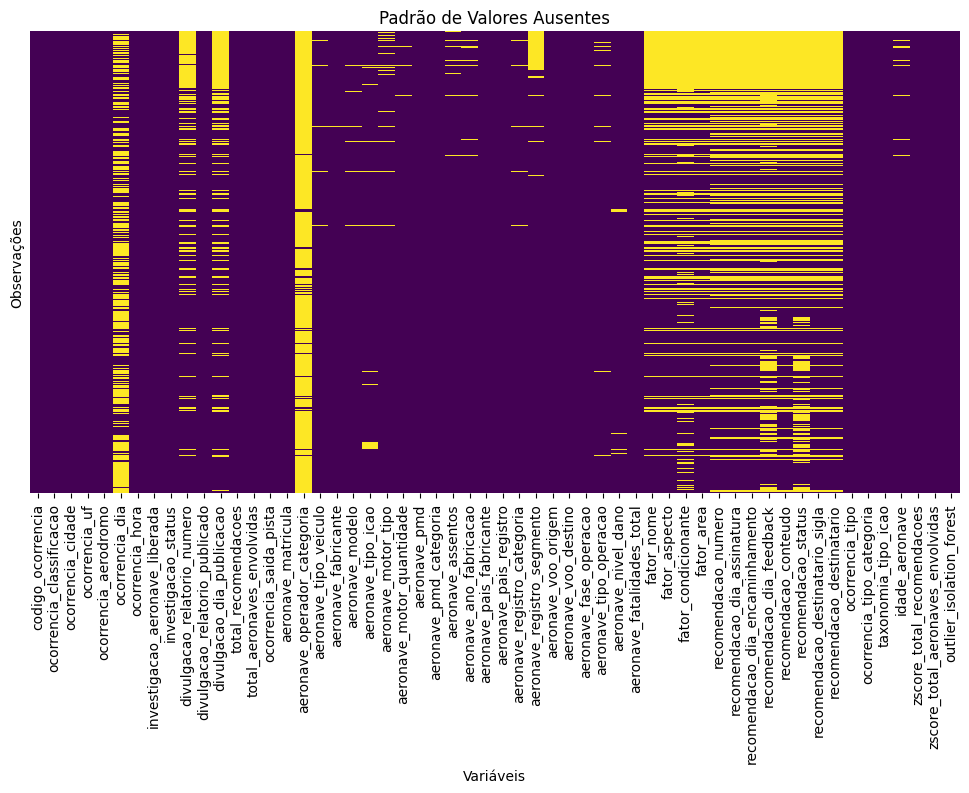

In [22]:
# Visualizando o padrão de valores ausentes
plt.figure(figsize=(12, 6))
sns.heatmap(df_merged.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Padrão de Valores Ausentes')
plt.xlabel('Variáveis')
plt.ylabel('Observações')
plt.show()

<Figure size 1200x600 with 0 Axes>

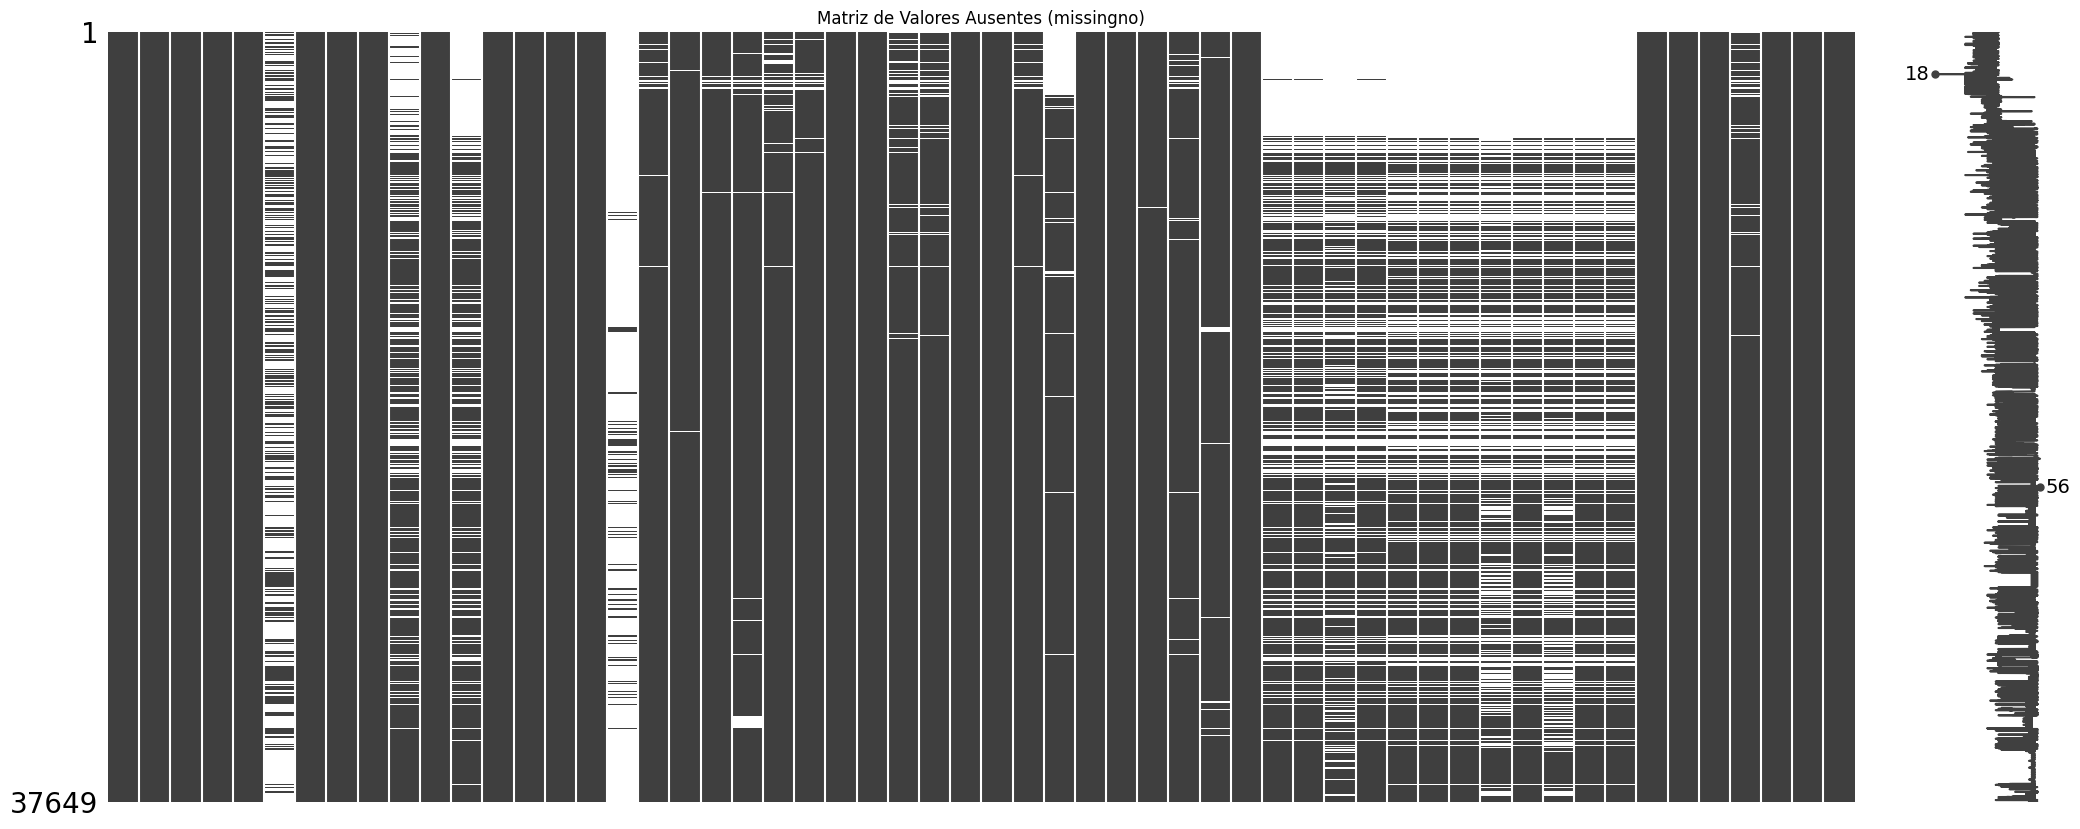

In [23]:
# Usando a biblioteca missingno para visualização especializada
plt.figure(figsize=(12, 6))
msno.matrix(df_merged)
plt.title('Matriz de Valores Ausentes (missingno)')
plt.show()

<Figure size 1000x800 with 0 Axes>

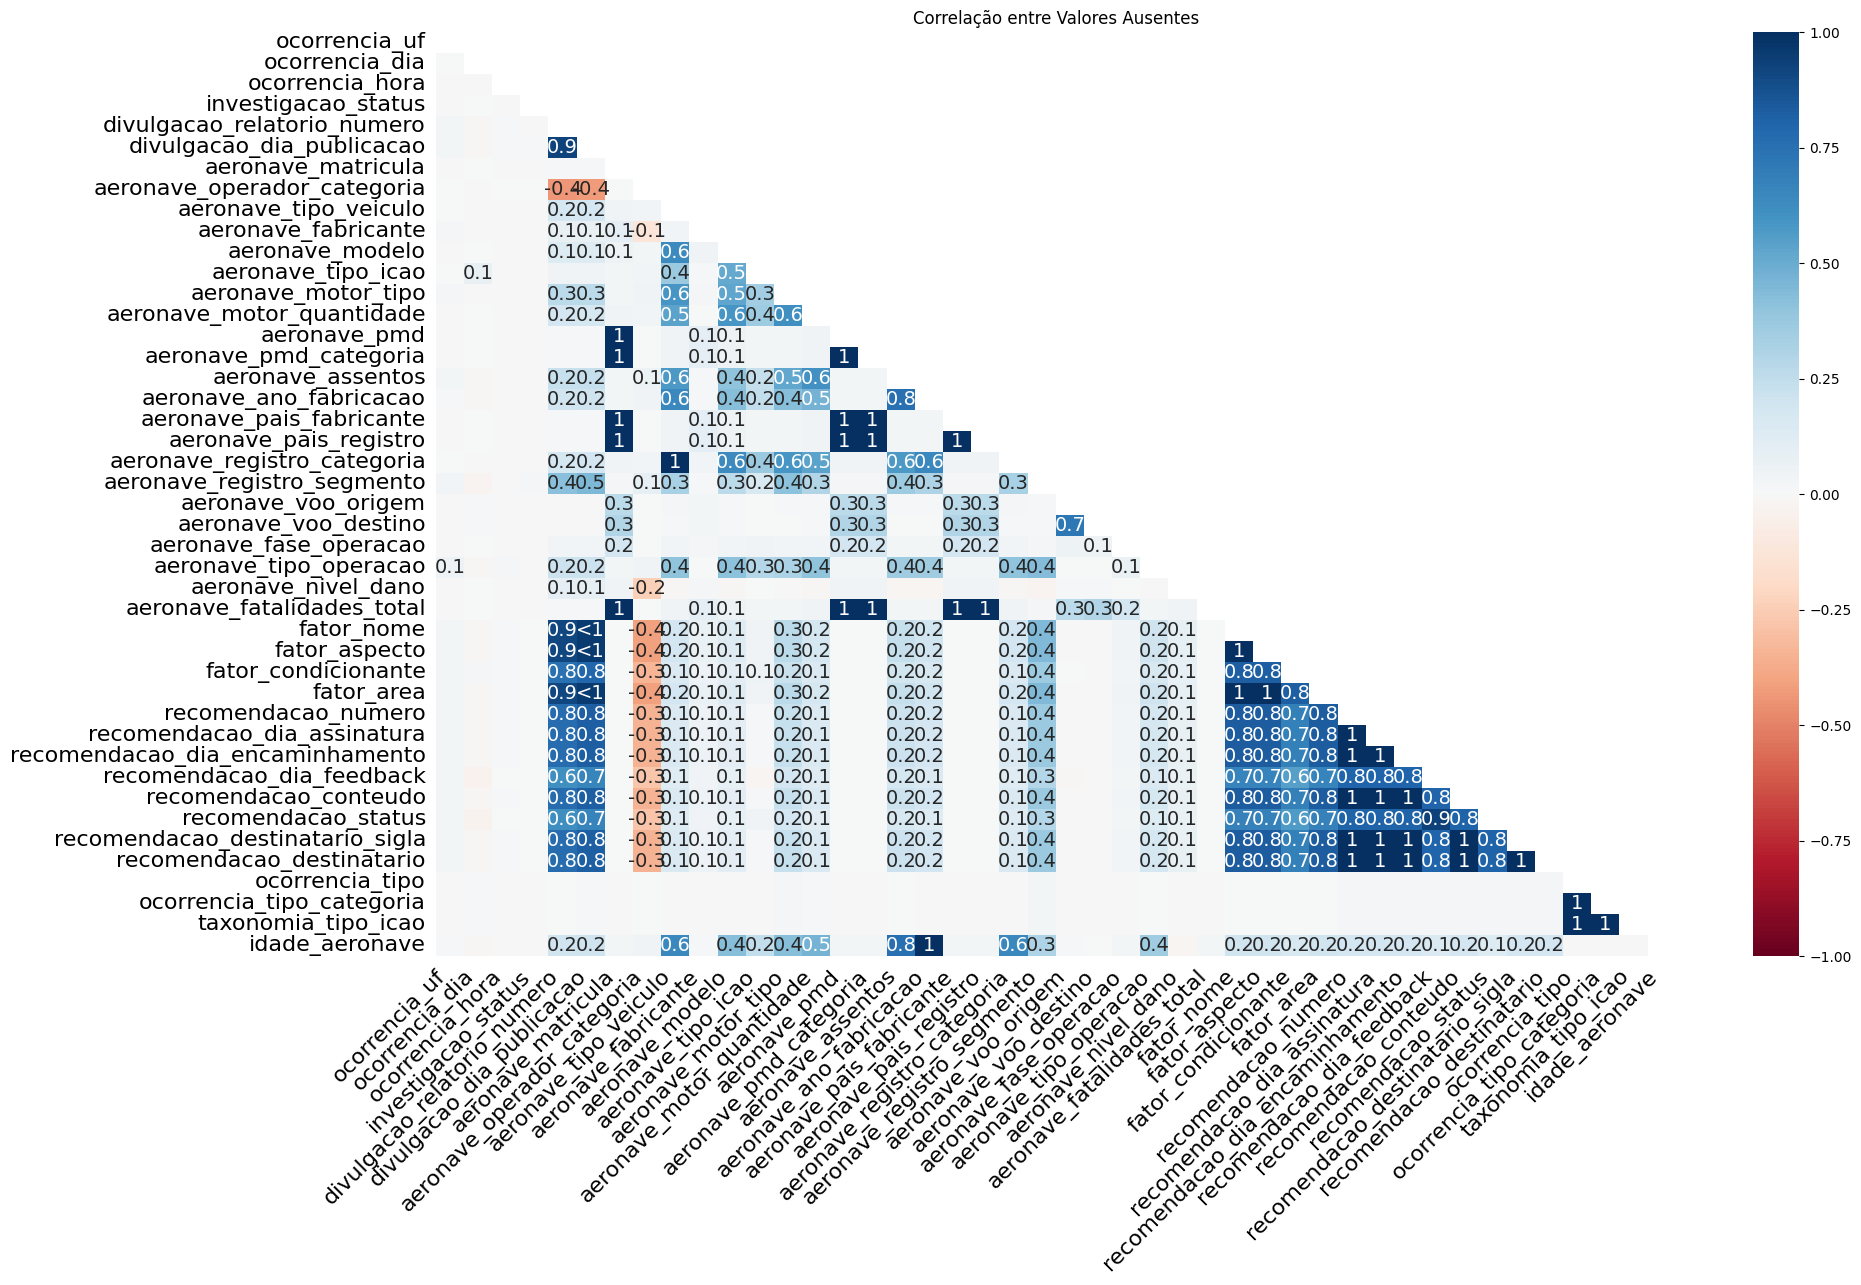

In [24]:
# Visualizando a correlação entre valores ausentes
plt.figure(figsize=(10, 8))
msno.heatmap(df_merged)
plt.title('Correlação entre Valores Ausentes')
plt.show()

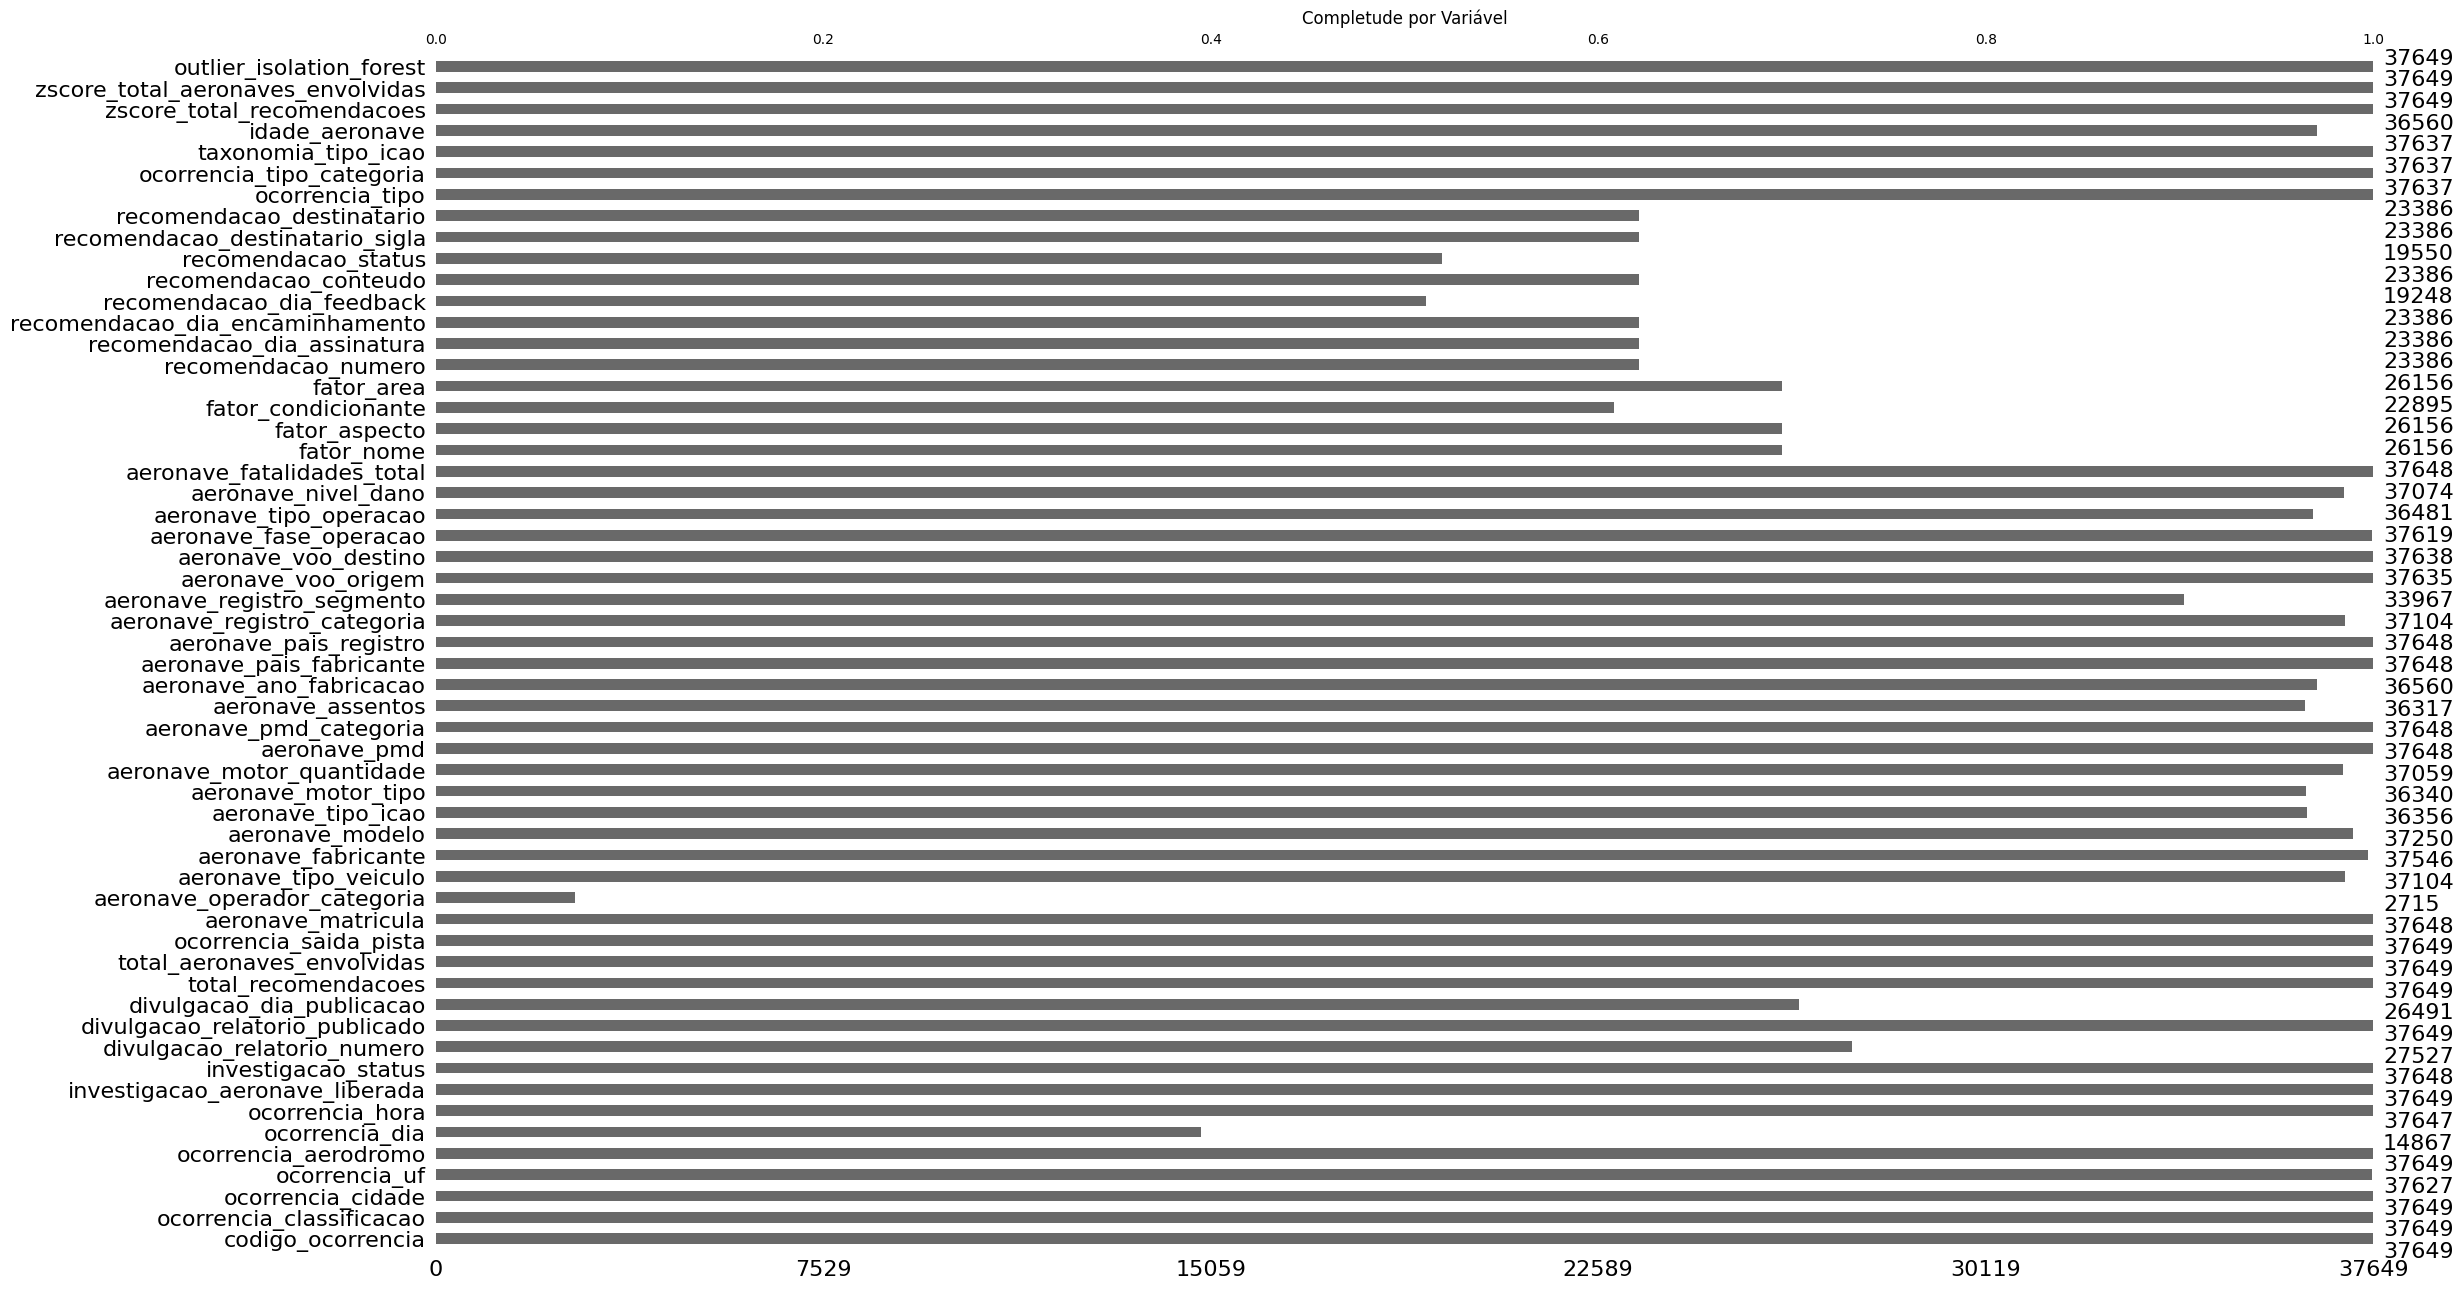

In [25]:
# Análise de valor ausente por variável
plt.figure(figsize=(12, 6))
msno.bar(df_merged)
plt.title('Completude por Variável')
plt.show()